In [2]:
import pandas as pd

df_1 = pd.read_csv("filtered_data_197971.csv", index_col=0)
features = ["SALE TIMES", "GROSS LAND RATIO", 'DAY','MONTH','YEAR',
            'BUILDING CLASS CATEGORY', 'ZIP CODE', 'RESIDENTIAL UNITS',
            'COMMERCIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET',
            "UPPER BUILDING CLASS AT TIME OF SALE",
            'AGE', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
            'Latitude', 'Longitude',"SALE PRICE"]
df_1['SALE DATE'] = pd.to_datetime(df_1['SALE DATE'])
df_1['DAY'] = df_1['SALE DATE'].dt.day
df_1['MONTH'] = df_1['SALE DATE'].dt.month
df_1['YEAR'] = df_1['SALE DATE'].dt.year
df_1["SALE TIMES"] = df_1["ADDRESS"].map(df_1["ADDRESS"].value_counts().to_dict())
df_1["GROSS LAND RATIO"] = df_1["GROSS SQUARE FEET"]/df_1["LAND SQUARE FEET"]
df_1["UPPER BUILDING CLASS AT TIME OF SALE"] = df_1[f"BUILDING CLASS AT TIME OF SALE"].str[0]
df_1 = df_1[features]
# spatial_features = ["Latitude", "Longitude"]
# temporal_features = ['DAY','MONTH','YEAR']
# categorical_features = ["BUILDING CLASS CATEGORY", 'ZIP CODE',
#                         'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE']
# numeric_features = ["SALE TIMES", "GROSS LAND RATIO", 'RESIDENTIAL UNITS',
#                     'COMMERCIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'AGE']


In [3]:
def get_df_dict(df_1,by,category):
    category_dict = {"residential": ["A","B","C","D",'L','R',"S"],
                    "house": ["A","B"],
                    "apartment":["C","D",'L','R',"S"],
                    "commercial":['I','H','J','K','O'],
                    "all":[chr(ord('a') + i) for i in range(26)]}
    month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
                     5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
                     9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    df_dict = {}
    df_1 = df_1[df_1["BUILDING CLASS AT TIME OF SALE"].apply(lambda x: x[0] in category_dict[category])]
    if by == "month":
        for year in sorted(list(set(df_1["YEAR"]))):
            for month in sorted(list(set(df_1["MONTH"]))):
                df = df_1[(df_1["YEAR"]==year)&(df_1["MONTH"]==month)]
                df_dict[" ".join([str(year),month_mapping[month]])] = df
    if by == "year":
        for year in sorted(list(set(df_1["YEAR"]))):
                df = df_1[df_1["YEAR"]==year]
                df_dict[str(year)] = df
    return df_dict

KeyboardInterrupt: 

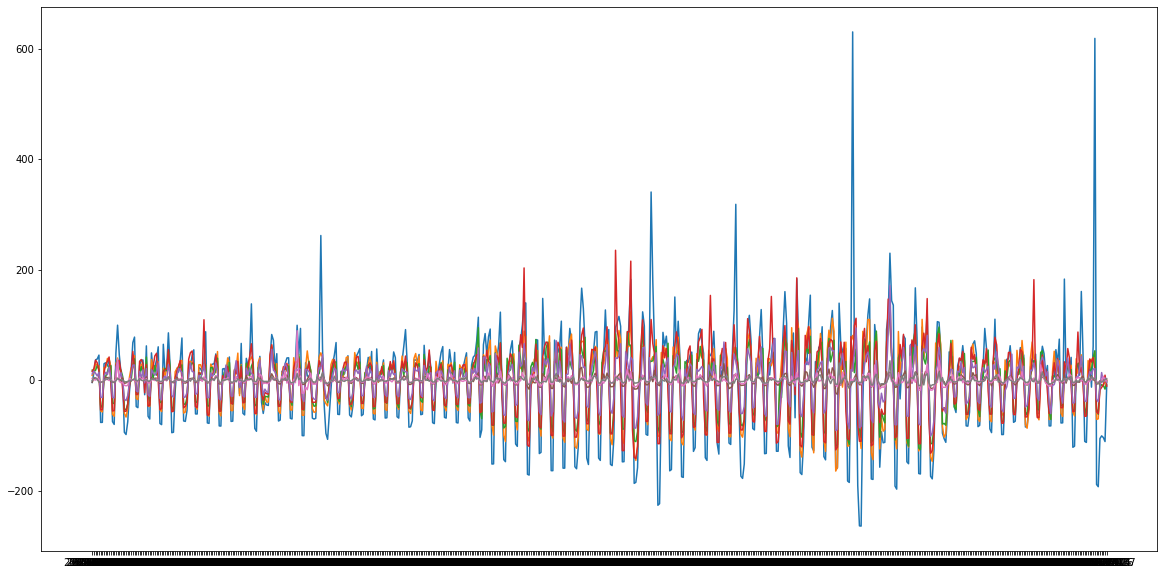

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
# Create a plot
plt.figure(figsize=(20, 10))
k = 6800
# Iterate over unique values in the 'Category' column
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:10].index)
date_list = set(df["SALE DATE"])

for category in category_list[:]:
    # Select rows corresponding to the current category
    category_data = df[df['UPPER BUILDING CLASS NAME'] == category]
    values_list = list(date_list - set(category_data["SALE DATE"]))
    new_data = pd.DataFrame({'SALE DATE': values_list,
                             "UPPER BUILDING CLASS AT TIME OF SALE":[category_data.iloc[0,1]] * len(values_list),
                             'BOROUGH': [0] * len(values_list),
                             "UPPER BUILDING CLASS NAME":[category] * len(values_list)})
    category_data = pd.concat([category_data, new_data], ignore_index=True)
    category_data = category_data.sort_values("SALE DATE")
    category_data.index = list(range(len(category_data)))
    # Plot the line for the current category
    window_size = 7
    # category_data['RollingMean'] = category_data['BOROUGH'].rolling(window=window_size).mean()
    category_data['Detrended Numbers'] = category_data['BOROUGH'] - category_data['BOROUGH'].rolling(window=window_size).mean()
    category_data = category_data[k:k+600]
    plt.plot(category_data['SALE DATE'], category_data['Detrended Numbers'], label=category)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Property Sale Total Number')
n = 28
plt.xticks(range(0, len(category_data["SALE DATE"]), n), list(category_data["SALE DATE"])[::n])
plt.xticks(rotation=45)
plt.title('Detrended Property Sale Number')
plt.ylim([-200,300])
plt.legend()
plt.savefig("plot 36.png")
# Show the plot
plt.show()

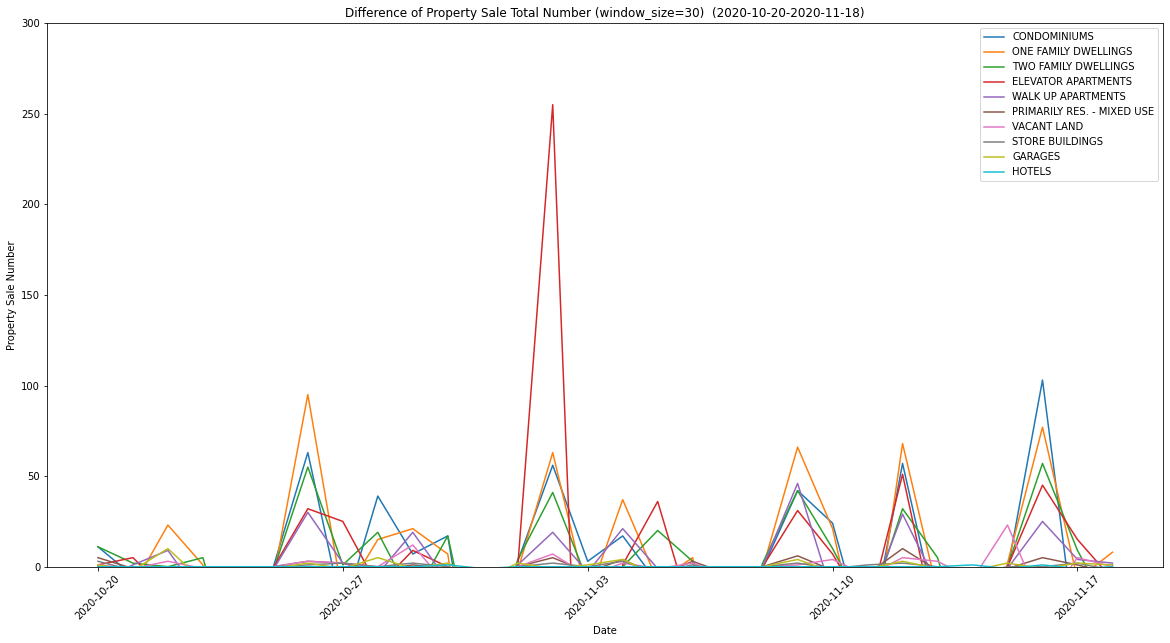

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
# Create a plot
plt.figure(figsize=(20, 10))
k = 6500
# Iterate over unique values in the 'Category' column
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:10].index)
date_list = set(df["SALE DATE"])

for category in category_list[:]:
    # Select rows corresponding to the current category
    category_data = df[df['UPPER BUILDING CLASS NAME'] == category]
    values_list = list(date_list - set(category_data["SALE DATE"]))
    new_data = pd.DataFrame({'SALE DATE': values_list,
                             "UPPER BUILDING CLASS AT TIME OF SALE":[category_data.iloc[0,1]] * len(values_list),
                             'BOROUGH': [0] * len(values_list),
                             "UPPER BUILDING CLASS NAME":[category] * len(values_list)})
    category_data = pd.concat([category_data, new_data], ignore_index=True)
    category_data = category_data.sort_values("SALE DATE")
    category_data.index = list(range(len(category_data)))
    window_size = 30
    category_data['Rolling Std'] = category_data['BOROUGH'].diff()
    category_data = category_data[k:k+30]
    min_date = str(min(category_data["SALE DATE"]))
    max_date = str(max(category_data["SALE DATE"]))
    plt.plot(category_data['SALE DATE'], category_data['Rolling Std'], label=category)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Property Sale Number')
n = 7
plt.xticks(range(0, len(category_data["SALE DATE"]), n), list(category_data["SALE DATE"])[::n])
plt.xticks(rotation=45)
plt.title(title:=f'Difference of Property Sale Total Number (window_size={str(window_size)})  ({min_date}-{max_date})')
plt.ylim([0,300])
plt.legend()
plt.savefig(title)
# Show the plot
plt.show()

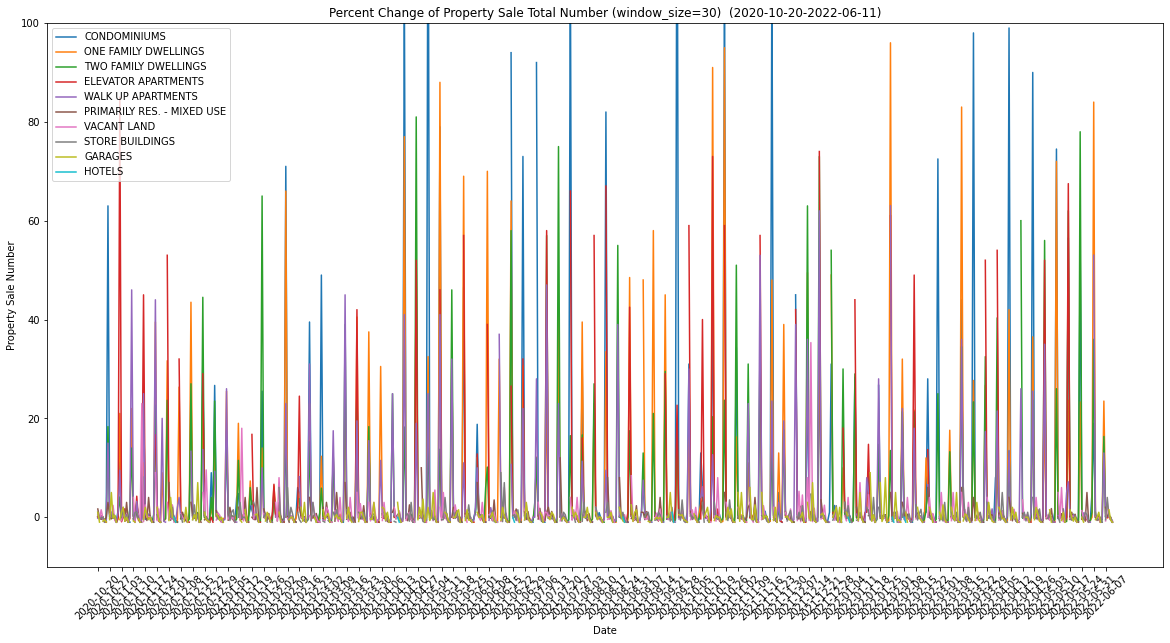

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
# Create a plot
plt.figure(figsize=(20, 10))
k = 6500
# Iterate over unique values in the 'Category' column
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:10].index)
date_list = set(df["SALE DATE"])

for category in category_list[:]:
    # Select rows corresponding to the current category
    category_data = df[df['UPPER BUILDING CLASS NAME'] == category]
    values_list = list(date_list - set(category_data["SALE DATE"]))
    new_data = pd.DataFrame({'SALE DATE': values_list,
                             "UPPER BUILDING CLASS AT TIME OF SALE":[category_data.iloc[0,1]] * len(values_list),
                             'BOROUGH': [0] * len(values_list),
                             "UPPER BUILDING CLASS NAME":[category] * len(values_list)})
    category_data = pd.concat([category_data, new_data], ignore_index=True)
    category_data = category_data.sort_values("SALE DATE")
    category_data.index = list(range(len(category_data)))
    window_size = 30
    category_data['Rolling Std'] = category_data['BOROUGH'].pct_change()
    category_data = category_data[k:k+600]
    min_date = str(min(category_data["SALE DATE"]))
    max_date = str(max(category_data["SALE DATE"]))
    plt.plot(category_data['SALE DATE'], category_data['Rolling Std'], label=category)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Property Sale Number')
n = 7
plt.xticks(range(0, len(category_data["SALE DATE"]), n), list(category_data["SALE DATE"])[::n])
plt.xticks(rotation=45)
plt.title(title:=f'Percent Change of Property Sale Total Number (window_size={str(window_size)})  ({min_date}-{max_date})')
plt.ylim([-10,100])
plt.legend()
plt.savefig(title)
# Show the plot
plt.show()

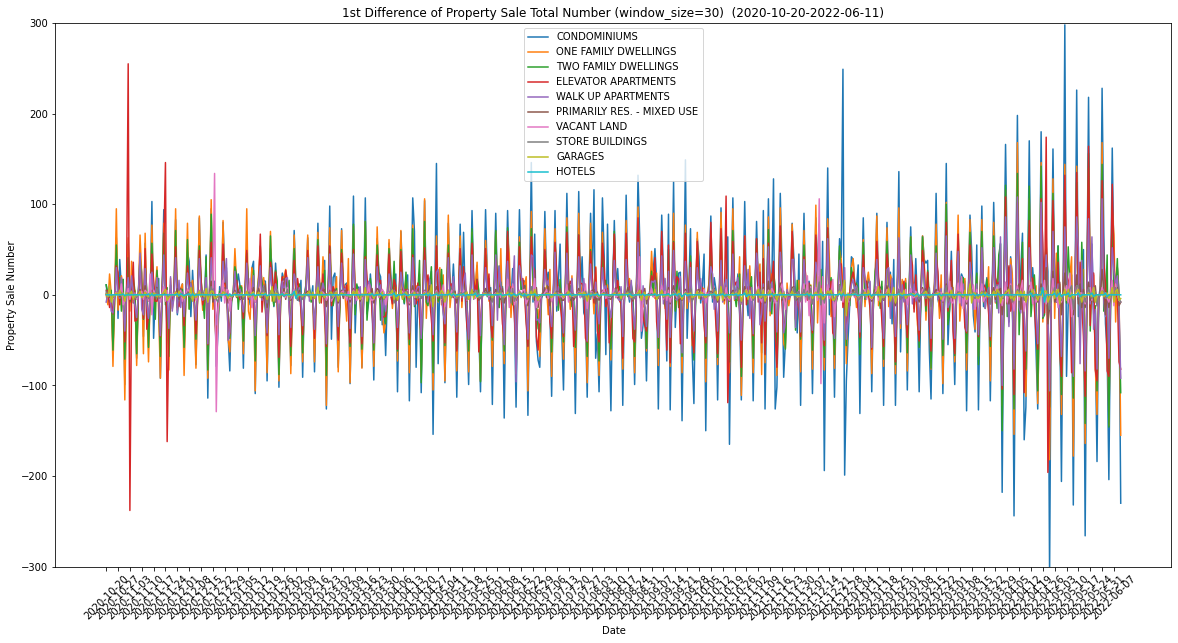

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
# Create a plot
plt.figure(figsize=(20, 10))
k = 6500
# Iterate over unique values in the 'Category' column
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:10].index)
date_list = set(df["SALE DATE"])

for category in category_list[:]:
    # Select rows corresponding to the current category
    category_data = df[df['UPPER BUILDING CLASS NAME'] == category]
    values_list = list(date_list - set(category_data["SALE DATE"]))
    new_data = pd.DataFrame({'SALE DATE': values_list,
                             "UPPER BUILDING CLASS AT TIME OF SALE":[category_data.iloc[0,1]] * len(values_list),
                             'BOROUGH': [0] * len(values_list),
                             "UPPER BUILDING CLASS NAME":[category] * len(values_list)})
    category_data = pd.concat([category_data, new_data], ignore_index=True)
    category_data = category_data.sort_values("SALE DATE")
    category_data.index = list(range(len(category_data)))
    window_size = 30
    category_data['Rolling Std'] = category_data['BOROUGH'].diff()
    category_data = category_data[k:k+600]
    min_date = str(min(category_data["SALE DATE"]))
    max_date = str(max(category_data["SALE DATE"]))
    plt.plot(category_data['SALE DATE'], category_data['Rolling Std'], label=category)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Property Sale Number')
n = 7
plt.xticks(range(0, len(category_data["SALE DATE"]), n), list(category_data["SALE DATE"])[::n])
plt.xticks(rotation=45)
plt.title(title:=f'1st Difference of Property Sale Total Number (window_size={str(window_size)})  ({min_date}-{max_date})')
plt.ylim([-300,300])
plt.legend()
plt.savefig(title)
# Show the plot
plt.show()

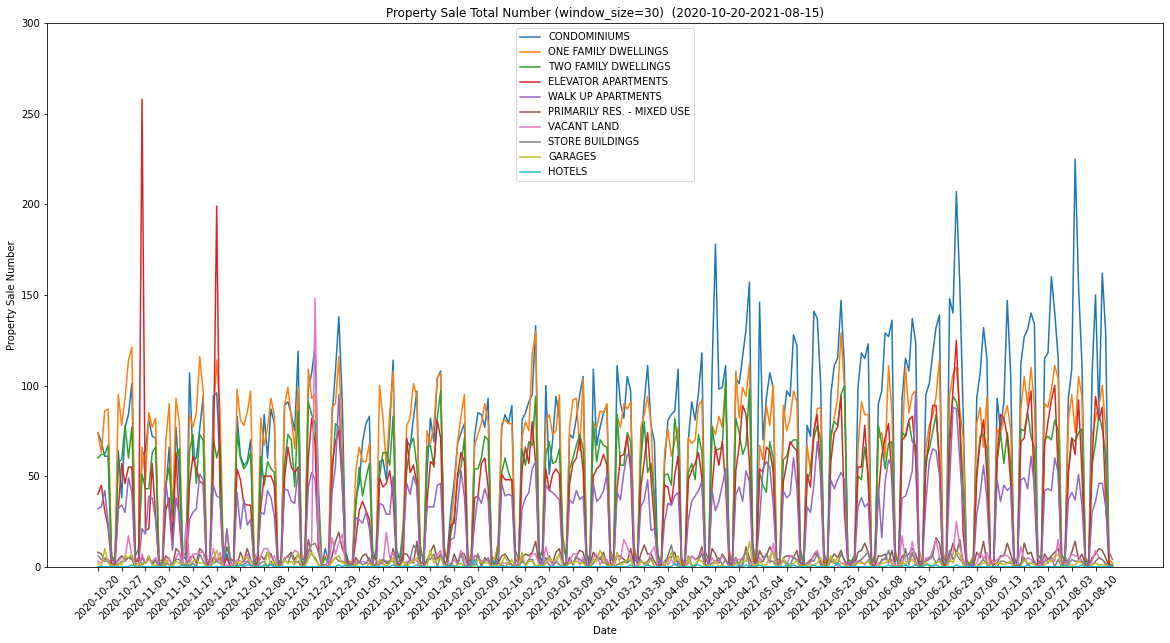

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
# Create a plot
plt.figure(figsize=(20, 10))
k = 6500
# Iterate over unique values in the 'Category' column
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:10].index)
date_list = set(df["SALE DATE"])

for category in category_list[:]:
    # Select rows corresponding to the current category
    category_data = df[df['UPPER BUILDING CLASS NAME'] == category]
    values_list = list(date_list - set(category_data["SALE DATE"]))
    new_data = pd.DataFrame({'SALE DATE': values_list,
                             "UPPER BUILDING CLASS AT TIME OF SALE":[category_data.iloc[0,1]] * len(values_list),
                             'BOROUGH': [0] * len(values_list),
                             "UPPER BUILDING CLASS NAME":[category] * len(values_list)})
    category_data = pd.concat([category_data, new_data], ignore_index=True)
    category_data = category_data.sort_values("SALE DATE")
    category_data.index = list(range(len(category_data)))
    window_size = 30
    category_data['Rolling Std'] = category_data['BOROUGH']
    category_data = category_data[k:k+300]
    min_date = str(min(category_data["SALE DATE"]))
    max_date = str(max(category_data["SALE DATE"]))
    plt.plot(category_data['SALE DATE'], category_data['Rolling Std'], label=category)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Property Sale Number')
n = 7
plt.xticks(range(0, len(category_data["SALE DATE"]), n), list(category_data["SALE DATE"])[::n])
plt.xticks(rotation=45)
plt.title(title:=f'Property Sale Total Number (window_size={str(window_size)})  ({min_date}-{max_date})')
plt.ylim([0,300])
plt.legend()
plt.savefig(title)
# Show the plot
plt.show()

In [36]:
import pandas as pd
df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0).drop("UPPER BUILDING CLASS AT TIME OF SALE",axis=1)
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:].index)
df_result = df.pivot_table(values='BOROUGH', index='SALE DATE', columns='UPPER BUILDING CLASS NAME')
df_result = df_result.fillna(0)[category_list][102:]
df_result.columns = [x+" Sale Number" for x in df_result.columns]
# df_pivot_2 = df_pivot_2[df_pivot_2.index.isin(df_pivot.index)]
df_result.index = pd.to_datetime(df_result.index)
df_result

CONDOMINIUMS Sale Number  ONE FAMILY DWELLINGS Sale Number  \
SALE DATE                                                                
2003-04-13                       3.0                               3.0   
2003-04-14                      58.0                             115.0   
2003-04-15                      56.0                             107.0   
2003-04-16                      52.0                             105.0   
2003-04-17                      45.0                             102.0   
...                              ...                               ...   
2023-09-26                      29.0                              23.0   
2023-09-27                      38.0                              17.0   
2023-09-28                      32.0                              12.0   
2023-09-29                      14.0                              17.0   
2023-09-30                       1.0                               0.0   

            TWO FAMILY DWELLINGS Sale Number  ELEVATOR APARTMENTS Sale Number  \
SALE DATE                                                                       
2003-04-13                               6.0                              3.0   
2003-04-14                             108.0                             67.0   
2003-04-15                             118.0                             75.0   
2003-04-16                              74.0                             51.0   
2003-04-17                              92.0                             47.0   
...                                      ...                              ...   
2023-09-26                              21.0                             30.0   
2023-09-27                              11.0                             34.0   
2023-09-28                              18.0                             40.0   
2023-09-29                              17.0                             10.0   
2023-09-30                               3.0                              0.0   

            WALK UP APARTMENTS Sale Number  \
SALE DATE                                    
2003-04-13                             4.0   
2003-04-14                            71.0   
2003-04-15                            63.0   
2003-04-16                            47.0   
2003-04-17                            50.0   
...                                    ...   
2023-09-26                            26.0   
2023-09-27                            14.0   
2023-09-28                            14.0   
2023-09-29                             7.0   
2023-09-30                             0.0   

            PRIMARILY RES. - MIXED USE Sale Number  VACANT LAND Sale Number  \
SALE DATE                                                                     
2003-04-13                                     2.0                      0.0   
2003-04-14                                    18.0                     27.0   
2003-04-15                                    14.0                     26.0   
2003-04-16                                    17.0                     21.0   
2003-04-17                                     9.0                     31.0   
...                                            ...                      ...   
2023-09-26                                     4.0                      1.0   
2023-09-27                                     1.0                      1.0   
2023-09-28                                     2.0                      2.0   
2023-09-29                                     2.0                      1.0   
2023-09-30                                     0.0                      0.0   

            STORE BUILDINGS Sale Number  GARAGES Sale Number  \
SALE DATE                                                      
2003-04-13                          1.0                  0.0   
2003-04-14                         13.0                  4.0   
2003-04-15                         10.0                  8.0   
2003-04-16                          3.0         

In [6]:
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

k = 3000
data = df_result.iloc[k:k+300,1:6].astype(float)
order = (p:=21, d:=0, q:=0, s:=7)
model = VARMAX(data, order=order)
results = model.fit()
# order = 14
# model = VAR(data)
# results = model.fit(order)


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
df_para

0  Lags  \
L1.ONE FAMILY DWELLINGS Sale Number.ONE FAMILY ...  0.098866     1   
L1.TWO FAMILY DWELLINGS Sale Number.ONE FAMILY ...  0.101083     1   
L1.ELEVATOR APARTMENTS Sale Number.ONE FAMILY D...  0.269026     1   
L1.WALK UP APARTMENTS Sale Number.ONE FAMILY DW...  0.008537     1   
L2.ONE FAMILY DWELLINGS Sale Number.ONE FAMILY ...  0.197542     2   
...                                                      ...   ...   
L20.WALK UP APARTMENTS Sale Number.WALK UP APAR... -0.104301    20   
L21.ONE FAMILY DWELLINGS Sale Number.WALK UP AP...  0.037452    21   
L21.TWO FAMILY DWELLINGS Sale Number.WALK UP AP...  0.113269    21   
L21.ELEVATOR APARTMENTS Sale Number.WALK UP APA... -0.160212    21   
L21.WALK UP APARTMENTS Sale Number.WALK UP APAR...  0.058374    21   

                                                                             Feature  \
L1.ONE FAMILY DWELLINGS Sale Number.ONE FAMILY ...  ONE FAMILY DWELLINGS Sale Number   
L1.TWO FAMILY DWELLINGS Sale Number.ONE FAMILY ...  TWO FAMILY DWELLINGS Sale Number   
L1.ELEVATOR APARTMENTS Sale Number.ONE FAMILY D...   ELEVATOR APARTMENTS Sale Number   
L1.WALK UP APARTMENTS Sale Number.ONE FAMILY DW...    WALK UP APARTMENTS Sale Number   
L2.ONE FAMILY DWELLINGS Sale Number.ONE FAMILY ...  ONE FAMILY DWELLINGS Sale Number   
...                                                                              ...   
L20.WALK UP APARTMENTS Sale Number.WALK UP APAR...    WALK UP APARTMENTS Sale Number   
L21.ONE FAMILY DWELLINGS Sale Number.WALK UP AP...  ONE FAMILY DWELLINGS Sale Number   
L21.TWO FAMILY DWELLINGS Sale Number.WALK UP AP...  TWO FAMILY DWELLINGS Sale Number   
L21.ELEVATOR APARTMENTS Sale Number.WALK UP APA...   ELEVATOR APARTMENTS Sale Number   
L21.WALK UP APARTMENTS Sale Number.WALK UP APAR...    WALK UP APARTMENTS Sale Number   

                                                                            Variable  
L1.ONE FAMILY DWELLINGS Sale Number.ONE FAMILY ...  ONE FAMILY DWELLINGS Sale Number  
L1.TWO FAMILY DWELLINGS Sale Number.ONE FAMILY ...  ONE FAMILY DWELLINGS Sale Number  
L1.ELEVATOR APARTMENTS Sale Number.ONE FAMILY D...  ONE FAMILY DWELLINGS Sale Number  
L1.WALK UP APARTMENTS Sale Number.ONE FAMILY DW...  ONE FAMILY DWELLINGS Sale Number  
L2.ONE FAMILY DWELLINGS Sale Number.ONE FAMILY ...  ONE FAMILY DWELLINGS Sale Number  
...                                                                              ...  
L20.WALK UP APARTMENTS Sale Number.WALK UP APAR...    WALK UP APARTMENTS Sale Number  
L21.ONE FAMILY DWELLINGS Sale Number.WALK UP AP...    WALK UP APARTMENTS Sale Number  
L21.TWO FAMILY DWELLINGS Sale Number.WALK UP AP...    WALK UP APARTMENTS Sale Number  
L21.ELEVATOR APARTMENTS Sale Number.WALK UP APA...    WALK UP APARTMENTS Sale Number  
L21.WALK UP APARTMENTS Sale Number.WALK UP APAR...    WALK UP APARTMENTS Sale Number  

[336 rows x 4 columns]

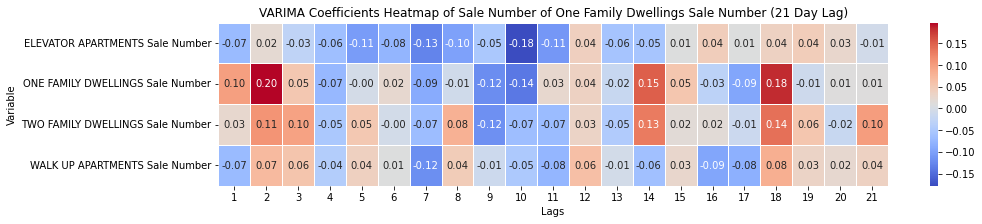

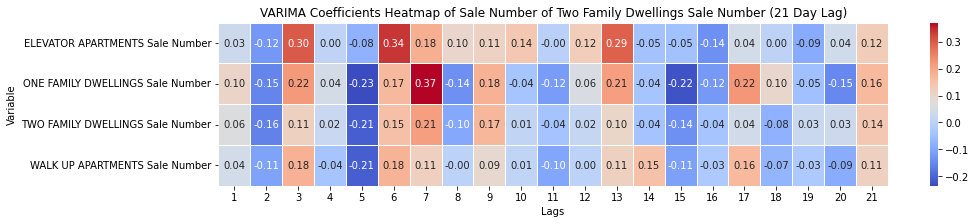

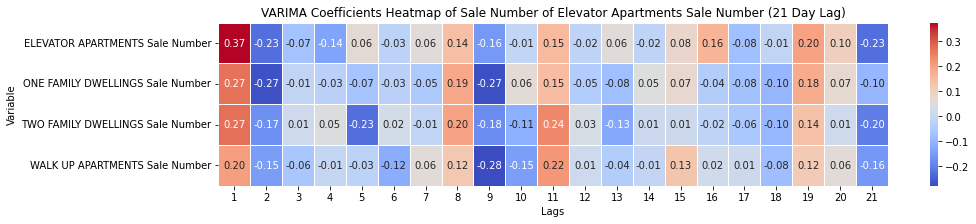

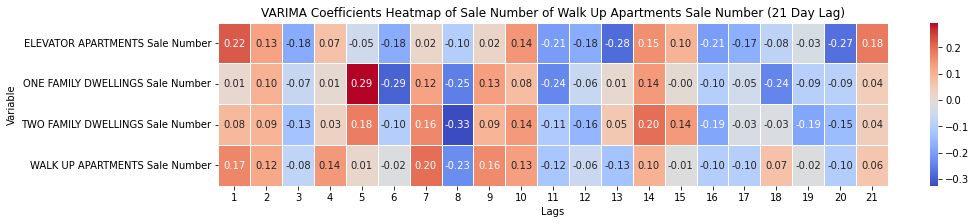

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1080x216 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt
params = results.params
df_para = pd.DataFrame(params)
df_para = df_para[(df_para.index.str.split('.').str.len()==3) & (df_para.index.str.split('.').str[0] != "sqrt")\
     & (df_para.index.str.split('.').str[0] != "intercept")]
df_para["Lags"] = df_para.index.str.split('.').str[0].str[1:].astype(int)
df_para["Feature"] = df_para.index.str.split('.').str[1]
df_para["Variable"] = df_para.index.str.split('.').str[2]
for category in list(df_result.columns)[1:6]:
    df_para_1 = df_para[df_para["Feature"] == category]
    df_pivot_1 = pd.pivot_table(df_para_1, values=0, index='Variable', columns='Lags')
    plt.figure(figsize=(15, 3))
    sns.heatmap(df_pivot_1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title:=f'VARIMA Coefficients Heatmap of Sale Number of {category.title()} ({str(max(df_para["Lags"]))} Day Lag)'.replace(" 00:00:00","").replace(".",""))
    plt.savefig(title)
    plt.show()

In [35]:
df_pivot_1

Empty DataFrame
Columns: []
Index: []

In [19]:
df_para[df_para["Feature"] == category]

Empty DataFrame
Columns: [0, Lags, Feature, Variable]
Index: []

In [114]:
# steps = 100  # Replace with the desired number of steps

# # Make predictions
# forecast = results.get_forecast(steps=steps)
# predicted_values = forecast.predicted_mean
# forecast_ci = forecast.conf_int()

forecast = results.forecast(steps=100)


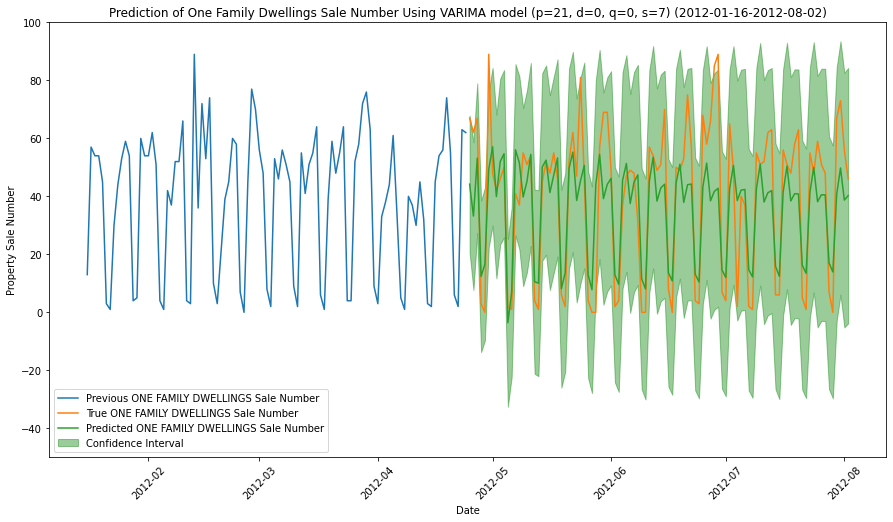

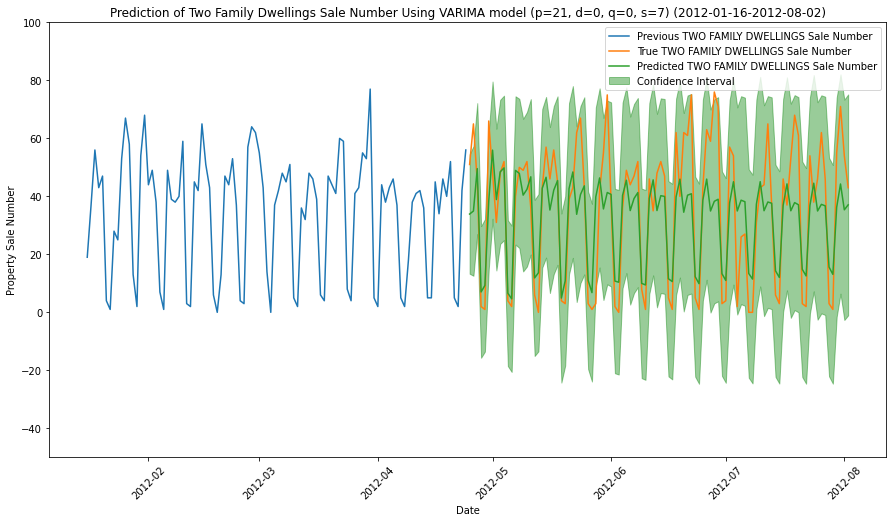

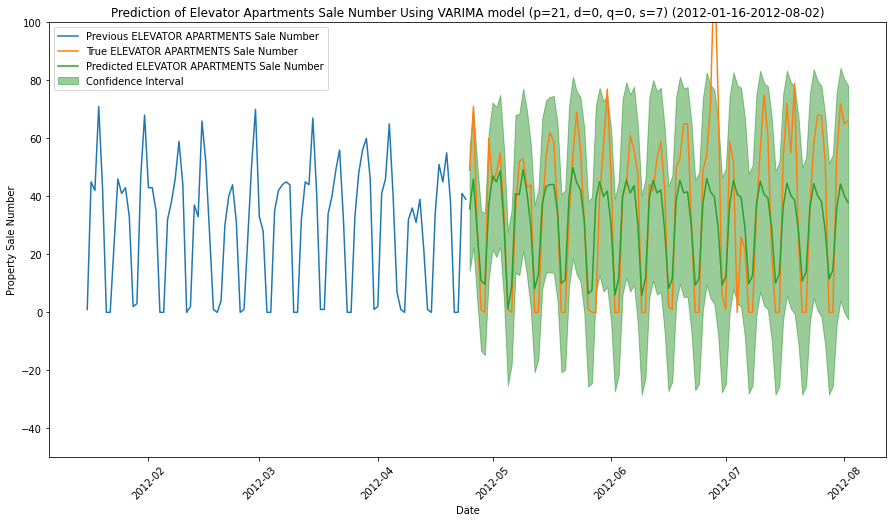

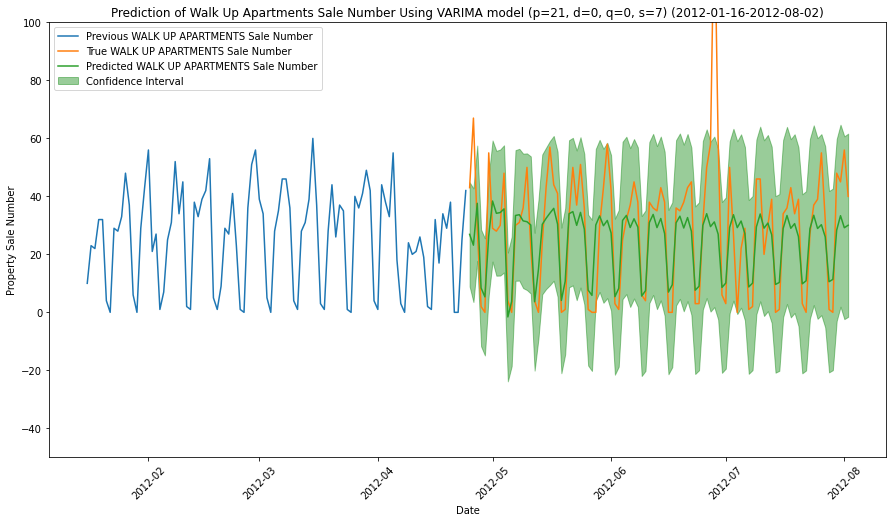

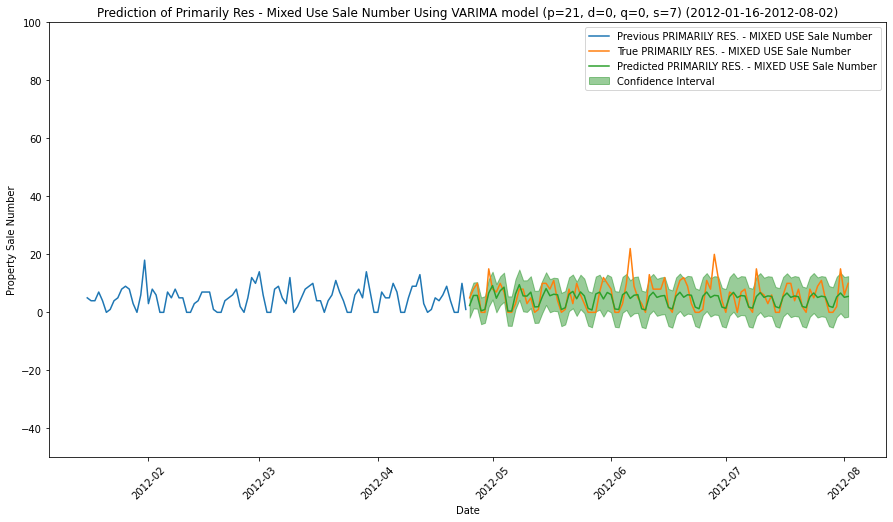

In [34]:


forecast = results.get_forecast(steps=100)
predicted_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

for i,category in enumerate(predicted_values.columns):
    plt.figure(figsize=(15, 8))
    k = 3000
    m = 300
    n = 100
    plt.plot(df_result.index[k+200:k+m], df_result[k+200:k+m][category], label="Previous "+category)
    plt.plot(df_result.index[k+m:k+m+n], df_result[k+m:k+m+n][category], label="True "+category)
    plt.plot(df_result.index[k+m:k+m+n], forecast.predicted_mean[category], label="Predicted "+category)
    plt.fill_between(df_result.index[k+m:k+m+n], forecast_ci.iloc[:, 0+i], forecast_ci.iloc[:, 5+i], color='green', alpha=0.4, label='Confidence Interval')
    plt.xlabel('Date')
    plt.ylabel('Property Sale Number')
    step = 7
    # plt.xticks(range(0, len(df_result["SALE DATE"][k+200:k+m+n]), step), list(df_result["SALE DATE"][k+200:k+m+n])[::step])
    plt.xticks(rotation=45)
    min_date = str(min(df_result.index[k+200:k+m+n]))
    max_date = str(max(df_result.index[k+200:k+m+n]))
    plt.title(title:=f'Prediction of {category.title()} Using VARIMA model (p={str(p)}, d={str(d)}, q={str(q)}, s={str(s)}) ({min_date}-{max_date})'.replace(" 00:00:00","").replace(".",""))
    plt.ylim([-50,100])
    plt.legend()
    plt.savefig(title)
    # Show the plot
    plt.show()

In [26]:
df_result.index[k+200:k+m]

DatetimeIndex(['2012-01-16', '2012-01-17', '2012-01-18', '2012-01-19',
               '2012-01-20', '2012-01-21', '2012-01-22', '2012-01-23',
               '2012-01-24', '2012-01-25', '2012-01-26', '2012-01-27',
               '2012-01-28', '2012-01-29', '2012-01-30', '2012-01-31',
               '2012-02-01', '2012-02-02', '2012-02-03', '2012-02-04',
               '2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14', '2012-02-15', '2012-02-16',
               '2012-02-17', '2012-02-18', '2012-02-19', '2012-02-20',
               '2012-02-21', '2012-02-22', '2012-02-23', '2012-02-24',
               '2012-02-25', '2012-02-26', '2012-02-27', '2012-02-28',
               '2012-02-29', '2012-03-01', '2012-03-02', '2012-03-03',
               '2012-03-04', '2012-03-05', '2012-03-06', '2012-03-07',
               '2012-03-08', '2012-03-09', '2012-03-10', '2012-03-11',
      

In [65]:
forecast_ci.iloc[:, 0]

3300   -48.126626
3301   -47.398473
3302   -17.327271
3303     5.164638
3304    28.218736
          ...    
3395   -32.562946
3396   -27.591376
3397   -27.273545
3398   -31.159817
3399   -36.199686
Name: lower CONDOMINIUMS, Length: 100, dtype: float64

In [66]:
forecast_ci.iloc[:, 1]

3300   -16.628545
3301   -23.534354
3302    -0.386648
3303     5.853096
3304    13.224513
          ...    
3395   -12.694328
3396   -10.085541
3397    -9.929568
3398   -11.861988
3399   -14.235118
Name: lower ONE FAMILY DWELLINGS, Length: 100, dtype: float64

In [67]:
forecast_ci

lower CONDOMINIUMS  lower ONE FAMILY DWELLINGS  \
3300          -48.126626                  -16.628545   
3301          -47.398473                  -23.534354   
3302          -17.327271                   -0.386648   
3303            5.164638                    5.853096   
3304           28.218736                   13.224513   
...                  ...                         ...   
3395          -32.562946                  -12.694328   
3396          -27.591376                  -10.085541   
3397          -27.273545                   -9.929568   
3398          -31.159817                  -11.861988   
3399          -36.199686                  -14.235118   

      lower TWO FAMILY DWELLINGS  lower ELEVATOR APARTMENTS  \
3300                  -15.041701                 -20.822716   
3301                  -17.936107                 -23.446710   
3302                    1.280370                  -0.883644   
3303                    7.634604                   8.817468   
3304                   11.961503                  21.120060   
...                          ...                        ...   
3395                  -10.441748                 -15.675117   
3396                   -8.054903                 -13.039689   
3397                   -7.874088                 -13.268479   
3398                   -9.581280                 -15.832806   
3399                  -11.718164                 -18.790661   

      lower WALK UP APARTMENTS  upper CONDOMINIUMS  \
3300                -16.067592           56.836610   
3301                -15.347093           67.791438   
3302                 -1.292598           98.342598   
3303                  5.451480          122.388237   
3304                 11.396901          146.462462   
...                        ...                 ...   
3395                -10.174097          148.280924   
3396                 -8.256632          153.340911   
3397                 -8.195303          153.688344   
3398                 -9.693970          149.811003   
3399                -11.555438          144.826371   

      upper ONE FAMILY DWELLINGS  upper TWO FAMILY DWELLINGS  \
3300                   35.239993                   30.067560   
3301                   33.898614                   31.969233   
3302                   57.597177                   51.771670   
3303                   64.668604                   59.450712   
3304                   72.560550                   64.120028   
...                          ...                         ...   
3395                   80.475095                   72.983331   
3396                   83.127987                   75.410543   
3397                   83.298766                   75.605390   
3398                   81.370526                   73.901708   
3399                   79.021825                   71.786490   

      upper ELEVATOR APARTMENTS  upper WALK UP APARTMENTS  
3300                  25.341324                 22.790113  
3301                  29.253236                 26.695906  
3302                  52.784808                 41.174838  
3303                  63.499232                 48.618911  
3304                  77.300711                 55.094757  
...                         ...                       ...  
3395                  80.016763                 58.538646  
3396                  82.708581                 60.490747  
3397                  82.493576                 60.562887  
3398                  79.938840                 59.067885  
3399                  77.021874                 57.226887  

[100 rows x 10 columns]

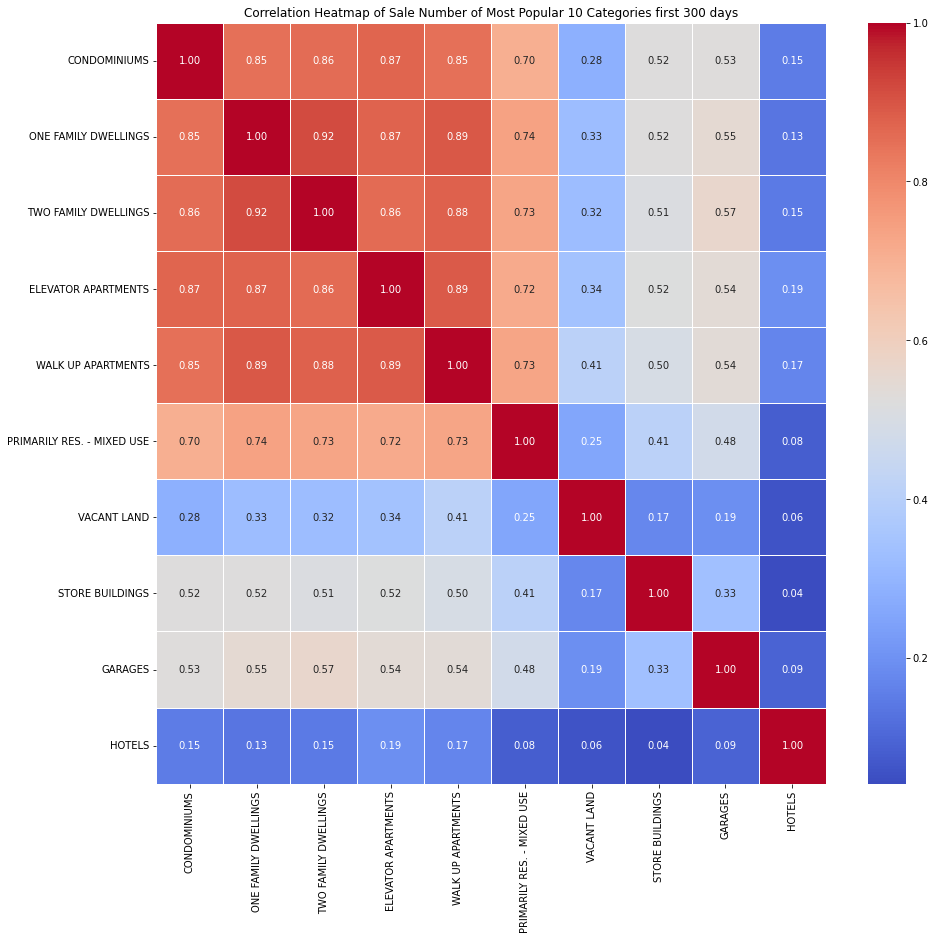

In [43]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler
m = 300
scaler = StandardScaler()
# df_standardized = pd.DataFrame(scaler.fit_transform(df_result.iloc[:,1:]), columns=df_result.columns[1:])
correlation_matrix = df_result.iloc[k:k+m,1:11].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(title:=f'Correlation Heatmap of Sale Number of Most Popular 10 Categories first {str(m)} days')
plt.savefig(title)
plt.show()

In [ ]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler
m = 300
scaler = StandardScaler()
# df_standardized = pd.DataFrame(scaler.fit_transform(df_result.iloc[:,1:]), columns=df_result.columns[1:])
correlation_matrix = df_result.iloc[k:k+m,1:].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(title:=f'Correlation Heatmap of Sale Number of Diiferent Categories first {str(m)} days')
plt.savefig(title)
plt.show()

In [1]:
def swap_halves(input_array):
    midpoint = len(input_array) // 2
    first_half = input_array[:midpoint]
    second_half = input_array[midpoint:]
    new_array = np.concatenate((second_half, first_half))
    return new_array

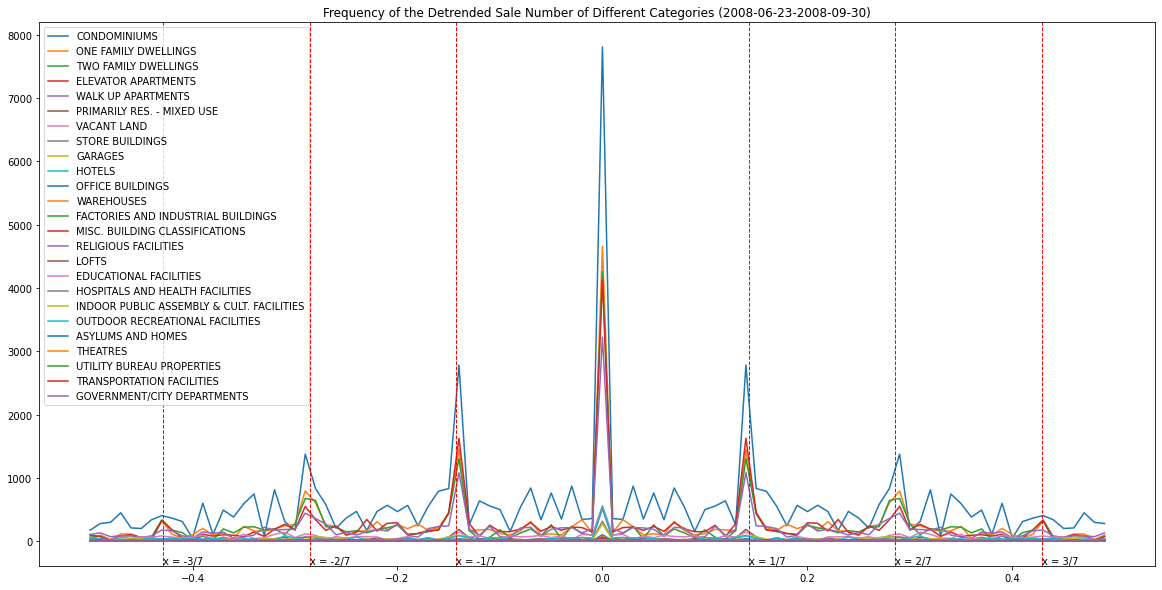

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Creating a vector for illustration
plt.figure(figsize=(20, 10))
k = 2000
# Iterate over unique values in the 'Category' column
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:].index)
date_list = set(df["SALE DATE"])

for category in category_list[:]:
    min_date = str(min(category_data["SALE DATE"]))
    max_date = str(max(category_data["SALE DATE"]))
    category_data = df[df['UPPER BUILDING CLASS NAME'] == category]
    values_list = list(date_list - set(category_data["SALE DATE"]))
    new_data = pd.DataFrame({'SALE DATE': values_list,
                             "UPPER BUILDING CLASS AT TIME OF SALE":[category_data.iloc[0,1]] * len(values_list),
                             'BOROUGH': [0] * len(values_list),
                             "UPPER BUILDING CLASS NAME":[category] * len(values_list)})
    category_data = pd.concat([category_data, new_data], ignore_index=True)
    category_data = category_data.sort_values("SALE DATE")
    category_data.index = list(range(len(category_data)))
    category_data = category_data[k:k+100]
    vector = category_data['BOROUGH']
    vector_size = len(vector)
    fft_result = swap_halves(np.fft.fft(vector))
    fft_freq = swap_halves(np.fft.fftfreq(vector_size,1))
    plt.plot(fft_freq, np.abs(fft_result), label=category)

vertical_line_positions = [(-1/7, "-1/7"), (1/7, "1/7"),(-2/7, "-2/7"), (2/7, "2/7"),(-3/7, "-3/7"), (3/7, "3/7")]  # Adjust the positions as needed

for position, text in vertical_line_positions:
    plt.axvline(x=position, color='r', linestyle='--', linewidth=1)
    plt.text(position, plt.ylim()[0], f'x = {text}', rotation=0, verticalalignment='bottom')

plt.title(f'Frequency of the Detrended Sale Number of Different Categories ({min_date}-{max_date})')
plt.legend()
# plt.savefig("plot 35.png")
plt.show()

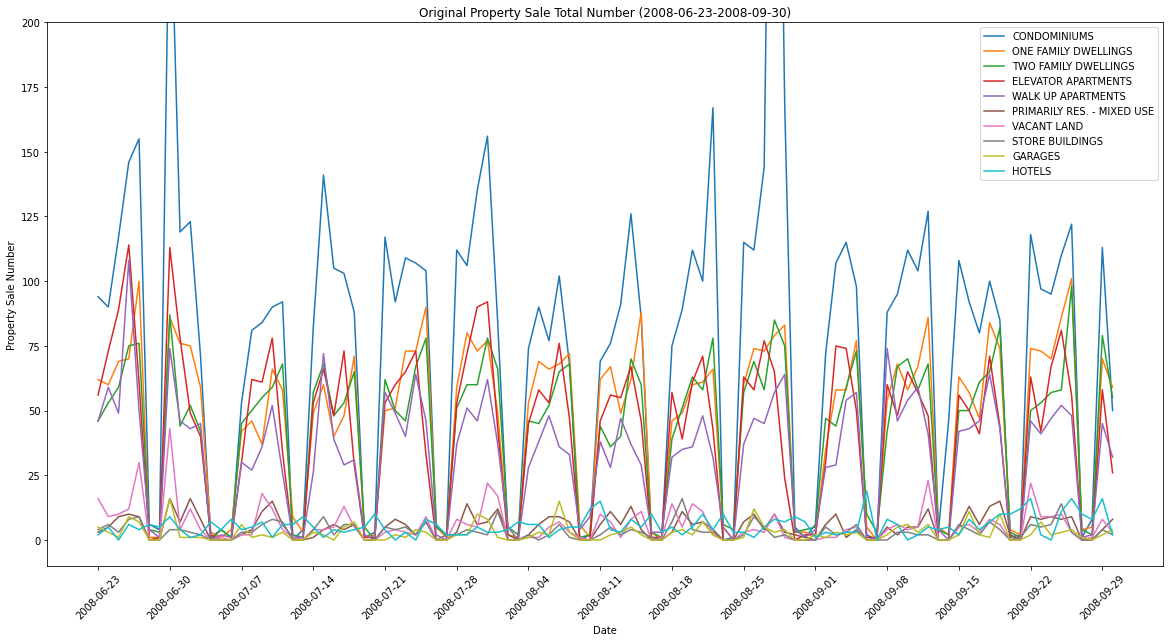

In [15]:
df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
# Create a plot
plt.figure(figsize=(20, 10))
k = 2000
# Iterate over unique values in the 'Category' column
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:10].index)
date_list = set(df["SALE DATE"])

for category in category_list[:]:
    # Select rows corresponding to the current category
    category_data = df[df['UPPER BUILDING CLASS NAME'] == category]
    values_list = list(date_list - set(category_data["SALE DATE"]))
    new_data = pd.DataFrame({'SALE DATE': values_list,
                             "UPPER BUILDING CLASS AT TIME OF SALE":[category_data.iloc[0,1]] * len(values_list),
                             'BOROUGH': [0] * len(values_list),
                             "UPPER BUILDING CLASS NAME":[category] * len(values_list)})
    category_data = pd.concat([category_data, new_data], ignore_index=True)
    category_data = category_data.sort_values("SALE DATE")
    category_data.index = list(range(len(category_data)))
    category_data = category_data[k:k+100]
    min_date = str(min(category_data["SALE DATE"]))
    max_date = str(max(category_data["SALE DATE"]))
    plt.plot(category_data['SALE DATE'], category_data['BOROUGH'], label=category)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Property Sale Number')
n = 7
plt.xticks(range(0, len(category_data["SALE DATE"]), n), list(category_data["SALE DATE"])[::n])
plt.xticks(rotation=45)
plt.title(title:=f'Original Property Sale Total Number ({min_date}-{max_date})')
plt.ylim([-10,200])
plt.legend()
plt.savefig(title)
# Show the plot
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to rea

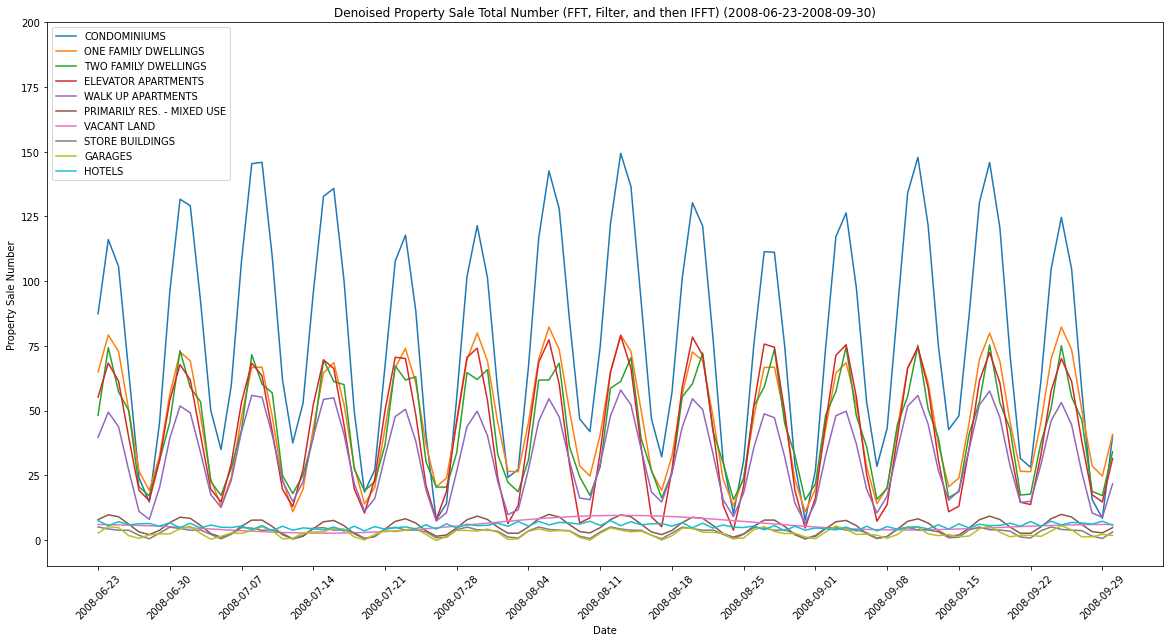

In [17]:
df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
# Create a plot
plt.figure(figsize=(20, 10))
k = 2000
# Iterate over unique values in the 'Category' column
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:10].index)
date_list = set(df["SALE DATE"])

for category in category_list[:]:
    # Select rows corresponding to the current category
    category_data = df[df['UPPER BUILDING CLASS NAME'] == category]
    values_list = list(date_list - set(category_data["SALE DATE"]))
    new_data = pd.DataFrame({'SALE DATE': values_list,
                             "UPPER BUILDING CLASS AT TIME OF SALE":[category_data.iloc[0,1]] * len(values_list),
                             'BOROUGH': [0] * len(values_list),
                             "UPPER BUILDING CLASS NAME":[category] * len(values_list)})
    category_data = pd.concat([category_data, new_data], ignore_index=True)
    category_data = category_data.sort_values("SALE DATE")
    category_data.index = list(range(len(category_data)))
    category_data = category_data[k:k+100]
    min_date = str(min(category_data["SALE DATE"]))
    max_date = str(max(category_data["SALE DATE"]))
    vector = category_data['BOROUGH']
    vector_size = len(vector)
    fft_result = np.fft.fft(vector)
    indices_of_largest = np.argsort(fft_result)[-7:]
    new_array = np.zeros_like(fft_result)
    new_array[indices_of_largest] = fft_result[indices_of_largest]
    ifft_result = np.fft.ifft(new_array)
    plt.plot(category_data['SALE DATE'], swap_halves(ifft_result), label=category)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Property Sale Number')
n = 7
plt.xticks(range(0, len(category_data["SALE DATE"]), n), list(category_data["SALE DATE"])[::n])
plt.xticks(rotation=45)
plt.title(title:=f'Denoised Property Sale Total Number (FFT, Filter, and then IFFT) ({min_date}-{max_date})')
plt.ylim([-10,200])
plt.legend()
plt.savefig(title)
# Show the plot
plt.show()

In [231]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
# Create a plot
plt.figure(figsize=(20, 10))
k = 7
# Iterate over unique values in the 'Category' column
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:].index)
date_list = set(df["SALE DATE"])
df_result = pd.DataFrame({"SALE DATE":sorted(list(set(df["SALE DATE"])))})
for category in category_list[:]:
    # Select rows corresponding to the current category
    category_data = df[df['UPPER BUILDING CLASS NAME'] == category]
    values_list = list(date_list - set(category_data["SALE DATE"]))
    new_data = pd.DataFrame({'SALE DATE': values_list,
                             "UPPER BUILDING CLASS AT TIME OF SALE":[category_data.iloc[0,1]] * len(values_list),
                             'BOROUGH': [0] * len(values_list),
                             "UPPER BUILDING CLASS NAME":[category] * len(values_list)})
    category_data = pd.concat([category_data, new_data], ignore_index=True)
    category_data = category_data.sort_values("SALE DATE")
    category_data.index = list(range(len(category_data)))
    # Plot the line for the current category
    # window_size = 200
    # category_data['RollingMean'] = category_data['BOROUGH'].rolling(window=window_size).mean()
    # category_data = category_data[k:k+2000]
    df_result[category] = category_data["BOROUGH"]
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_result.iloc[:,1:]), columns=df_result.columns[1:])



<Figure size 1440x720 with 0 Axes>

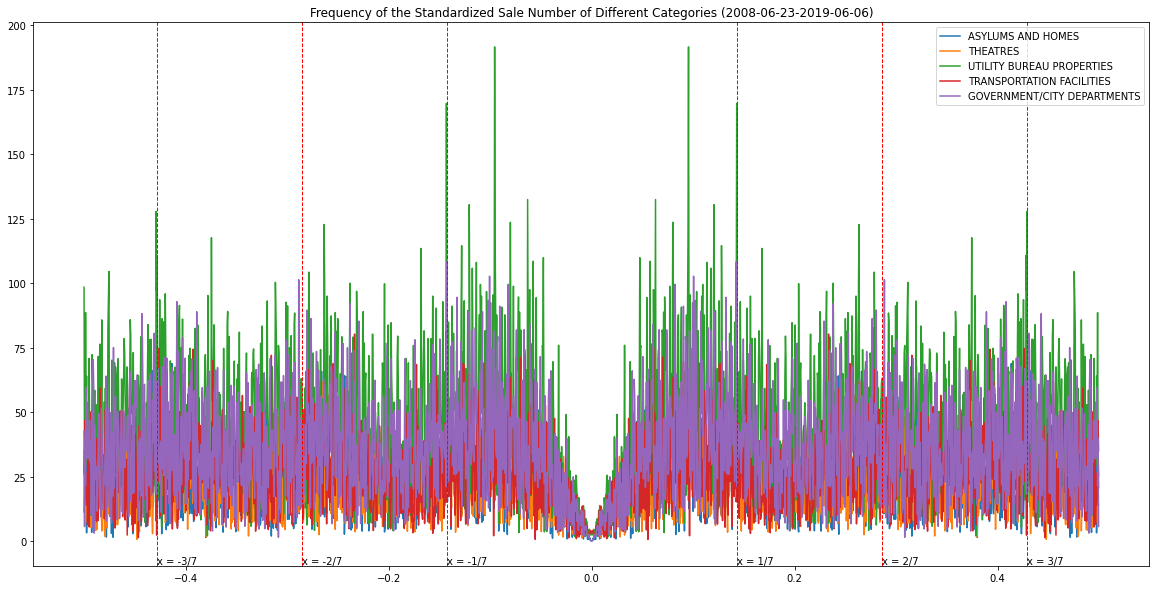

In [242]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Creating a vector for illustration
plt.figure(figsize=(20, 10))
k = 2000
# Iterate over unique values in the 'Category' column
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[20:].index)
date_list = set(df["SALE DATE"])

for category in category_list[:]:
    window_size = 7
    vector = df_standardized[category]-df_standardized[category].rolling(window=window_size).mean()
    vector = vector[k:k+2000]
    vector_size = len(vector)
    fft_result = swap_halves(np.fft.fft(vector))
    fft_freq = swap_halves(np.fft.fftfreq(vector_size,1))
    plt.plot(fft_freq, np.abs(fft_result), label=category)

vertical_line_positions = [(-1/7, "-1/7"), (1/7, "1/7"),(-2/7, "-2/7"), (2/7, "2/7"),(-3/7, "-3/7"), (3/7, "3/7")]  # Adjust the positions as needed

for position, text in vertical_line_positions:
    plt.axvline(x=position, color='r', linestyle='--', linewidth=1)
    plt.text(position, plt.ylim()[0], f'x = {text}', rotation=0, verticalalignment='bottom')

plt.title(f'Frequency of the Standardized Sale Number of Different Categories ({min_date}-{max_date})')
plt.legend()
plt.savefig("plot 60.png")
plt.show()

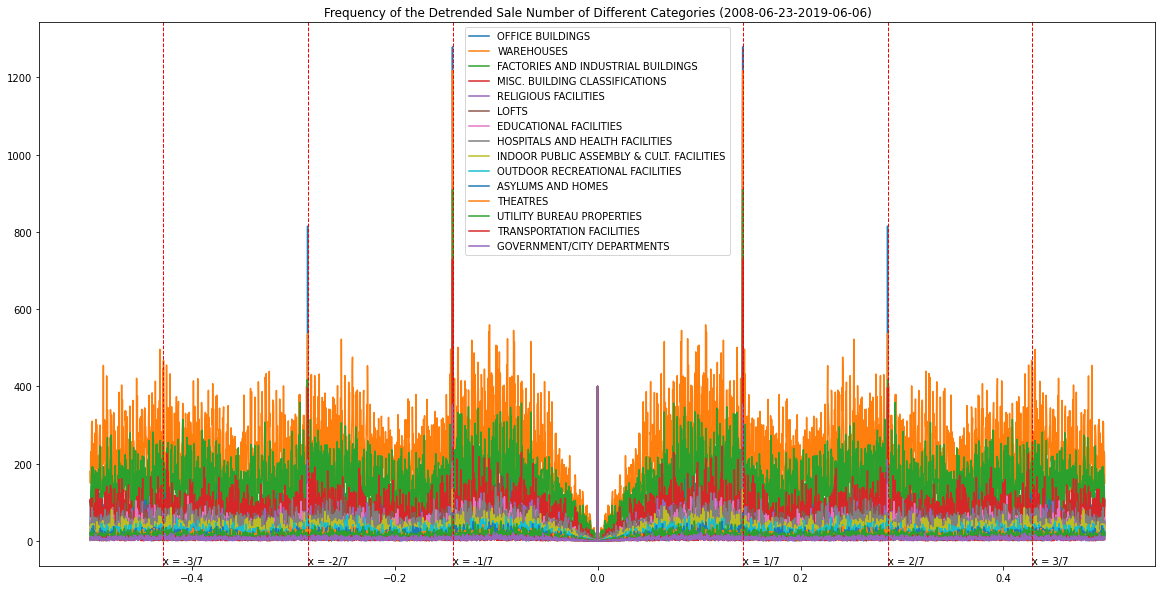

In [207]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Creating a vector for illustration
plt.figure(figsize=(20, 10))
k = 2000 
# Iterate over unique values in the 'Category' column
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[10:].index)
date_list = set(df["SALE DATE"])

for category in category_list[:]:
    min_date = str(min(category_data["SALE DATE"]))
    max_date = str(max(category_data["SALE DATE"]))
    category_data = df[df['UPPER BUILDING CLASS NAME'] == category]
    values_list = list(date_list - set(category_data["SALE DATE"]))
    new_data = pd.DataFrame({'SALE DATE': values_list,
                             "UPPER BUILDING CLASS AT TIME OF SALE":[category_data.iloc[0,1]] * len(values_list),
                             'BOROUGH': [0] * len(values_list),
                             "UPPER BUILDING CLASS NAME":[category] * len(values_list)})
    category_data = pd.concat([category_data, new_data], ignore_index=True)
    category_data = category_data.sort_values("SALE DATE")
    category_data.index = list(range(len(category_data)))
    window_size = 7
    # category_data['RollingMean'] = category_data['BOROUGH'].rolling(window=window_size).mean()
    category_data['Detrended Numbers'] = category_data['BOROUGH'] - category_data['BOROUGH'].rolling(window=window_size).mean()
    category_data = category_data[k:k+4000]
    vector = category_data['Detrended Numbers']+0.1
    vector_size = len(vector)
    fft_result = swap_halves(np.fft.fft(vector))
    fft_freq = swap_halves(np.fft.fftfreq(vector_size,1))
    plt.plot(fft_freq, np.abs(fft_result), label=category)

vertical_line_positions = [(-1/7, "-1/7"), (1/7, "1/7"),(-2/7, "-2/7"), (2/7, "2/7"),(-3/7, "-3/7"), (3/7, "3/7")]  # Adjust the positions as needed

for position, text in vertical_line_positions:
    plt.axvline(x=position, color='r', linestyle='--', linewidth=1)
    plt.text(position, plt.ylim()[0], f'x = {text}', rotation=0, verticalalignment='bottom')

plt.title(f'Frequency of the Detrended Sale Number of Different Categories ({min_date}-{max_date})')
plt.legend()
# plt.ylim([0,75000])
plt.savefig("plot 41.png")
plt.show()

0.14285714285714285

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("day year month sale number of different classes of 20 years.csv", index_col=0)
# Create a plot
plt.figure(figsize=(20, 10))
k = 7
# Iterate over unique values in the 'Category' column
category_list = list(df.groupby("UPPER BUILDING CLASS NAME").sum().sort_values(by="BOROUGH", ascending=False)[:].index)
date_list = set(df["SALE DATE"])
df_result = pd.DataFrame({"SALE DATE":sorted(list(set(df["SALE DATE"])))})
for category in category_list[:]:
    # Select rows corresponding to the current category
    category_data = df[df['UPPER BUILDING CLASS NAME'] == category]
    values_list = list(date_list - set(category_data["SALE DATE"]))
    new_data = pd.DataFrame({'SALE DATE': values_list,
                             "UPPER BUILDING CLASS AT TIME OF SALE":[category_data.iloc[0,1]] * len(values_list),
                             'BOROUGH': [0] * len(values_list),
                             "UPPER BUILDING CLASS NAME":[category] * len(values_list)})
    category_data = pd.concat([category_data, new_data], ignore_index=True)
    category_data = category_data.sort_values("SALE DATE")
    category_data.index = list(range(len(category_data)))
    # Plot the line for the current category
    # window_size = 200
    # category_data['RollingMean'] = category_data['BOROUGH'].rolling(window=window_size).mean()
    # category_data = category_data[k:k+2000]
    df_result[category] = category_data["BOROUGH"]
df_result

SALE DATE  CONDOMINIUMS  ONE FAMILY DWELLINGS  TWO FAMILY DWELLINGS  \
0     2003-01-01             6                     7                    14   
1     2003-01-02            36                    67                    51   
2     2003-01-03            50                   100                    71   
3     2003-01-04             2                    10                     7   
4     2003-01-05             8                     9                    11   
...          ...           ...                   ...                   ...   
7571  2023-09-26            29                    23                    21   
7572  2023-09-27            38                    17                    11   
7573  2023-09-28            32                    12                    18   
7574  2023-09-29            14                    17                    17   
7575  2023-09-30             1                     0                     3   

      ELEVATOR APARTMENTS  WALK UP APARTMENTS  PRIMARILY RES. - MIXED USE  \
0                      13                  10                          10   
1                      45                  41                           9   
2                      54                  64                          22   
3                       3                   2                           2   
4                       1                   6                           1   
...                   ...                 ...                         ...   
7571                   30                  26                           4   
7572                   34                  14                           1   
7573                   40                  14                           2   
7574                   10                   7                           2   
7575                    0                   0                           0   

      VACANT LAND  STORE BUILDINGS  GARAGES  ...  LOFTS  \
0               3                4        0  ...      0   
1               8                8        3  ...      1   
2              13                7       11  ...      2   
3               1                0        0  ...      0   
4               0                0        0  ...      0   
...           ...              ...      ...  ...    ...   
7571            1                4        4  ...      0   
7572            1                1        0  ...      0   
7573            2                1        0  ...      0   
7574            1                0        0  ...      0   
7575            0                0        0  ...      0   

      EDUCATIONAL FACILITIES  HOSPITALS AND HEALTH FACILITIES  \
0                          0                                1   
1                          0                                0   
2                          1                                0   
3                          0                                0   
4                          0                                0   
...                      ...                              ...   
7571                       0                                0   
7572                       0                                0   
7573                       0                                0   
7574                       0                                0   
7575                       0                                0   

      INDOOR PUBLIC ASSEMBLY & CULT. FACILITIES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
...                                         ...   
7571                                          0   
7572                                          0   
7573                                          0   
7574                                          0   
7575                                          0   

      OUTDOOR RECREATIONAL FACILITIES  ASY

<Figure size 1440x720 with 0 Axes>

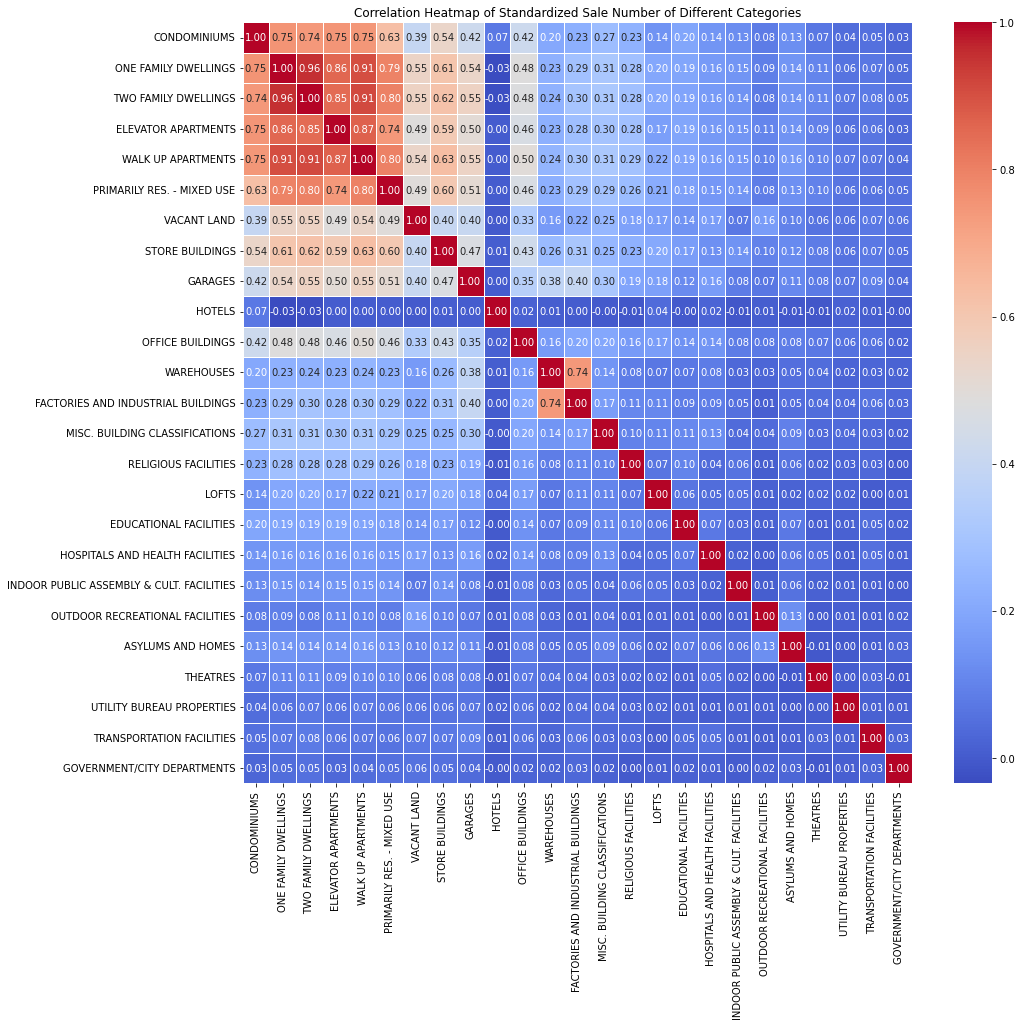

In [216]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_result.iloc[:,1:]), columns=df_result.columns[1:])
correlation_matrix = df_standardized[category_list].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Standardized Sale Number of Different Categories')
plt.savefig("plot 46.png")
plt.show()

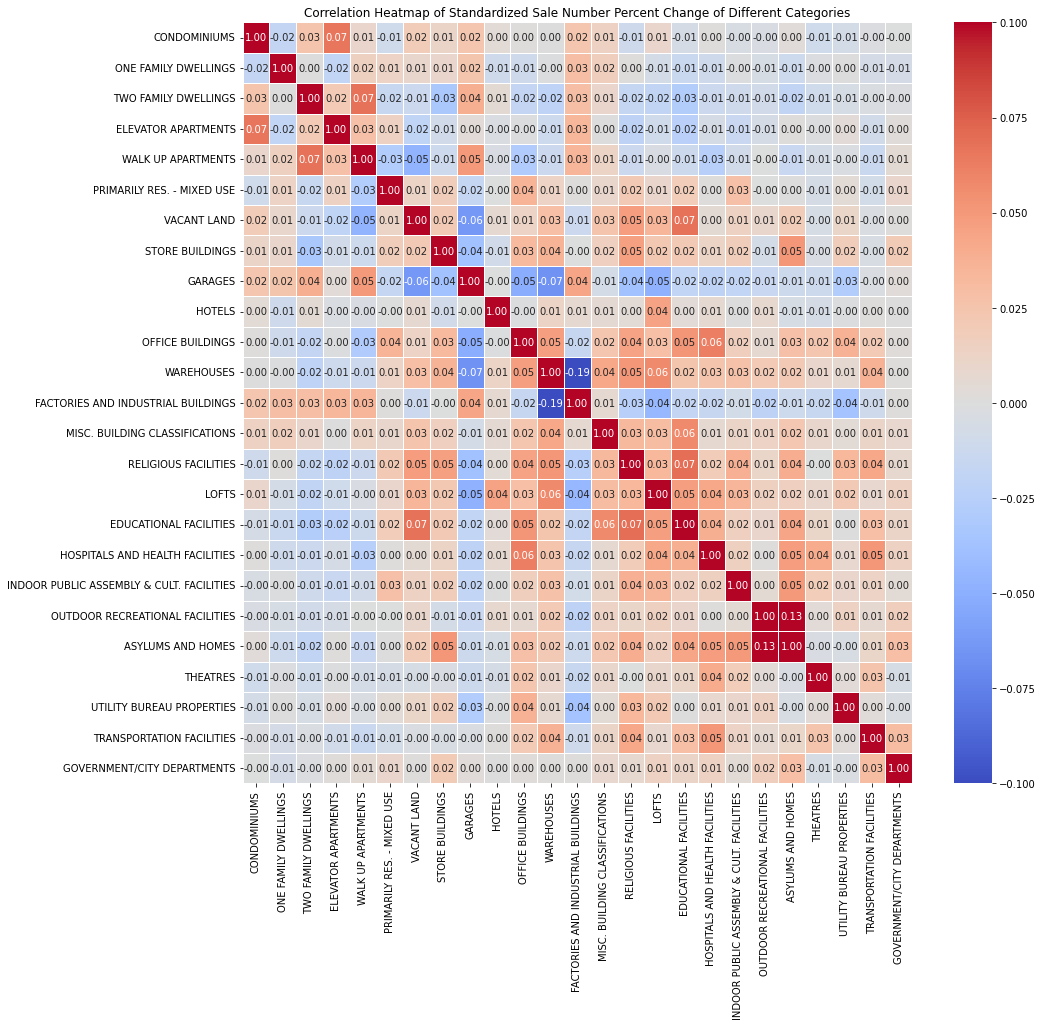

In [218]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_result.iloc[:,1:]), columns=df_result.columns[1:])
correlation_matrix = df_standardized.pct_change()[category_list].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-0.1, vmax=0.1)
plt.title('Correlation Heatmap of Standardized Sale Number Percent Change of Different Categories')
plt.savefig("plot 48.png")
plt.show()

In [1]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_result.iloc[:,1:]), columns=df_result.columns[1:])
correlation_matrix = df_standardized.pct_change()[category_list].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-0.5, vmax=0.5)
plt.title(title:='Correlation Heatmap of Standardized Sale Number Percent Change of Different Categories')
plt.savefig(title)
plt.show()

NameError: name 'pd' is not defined

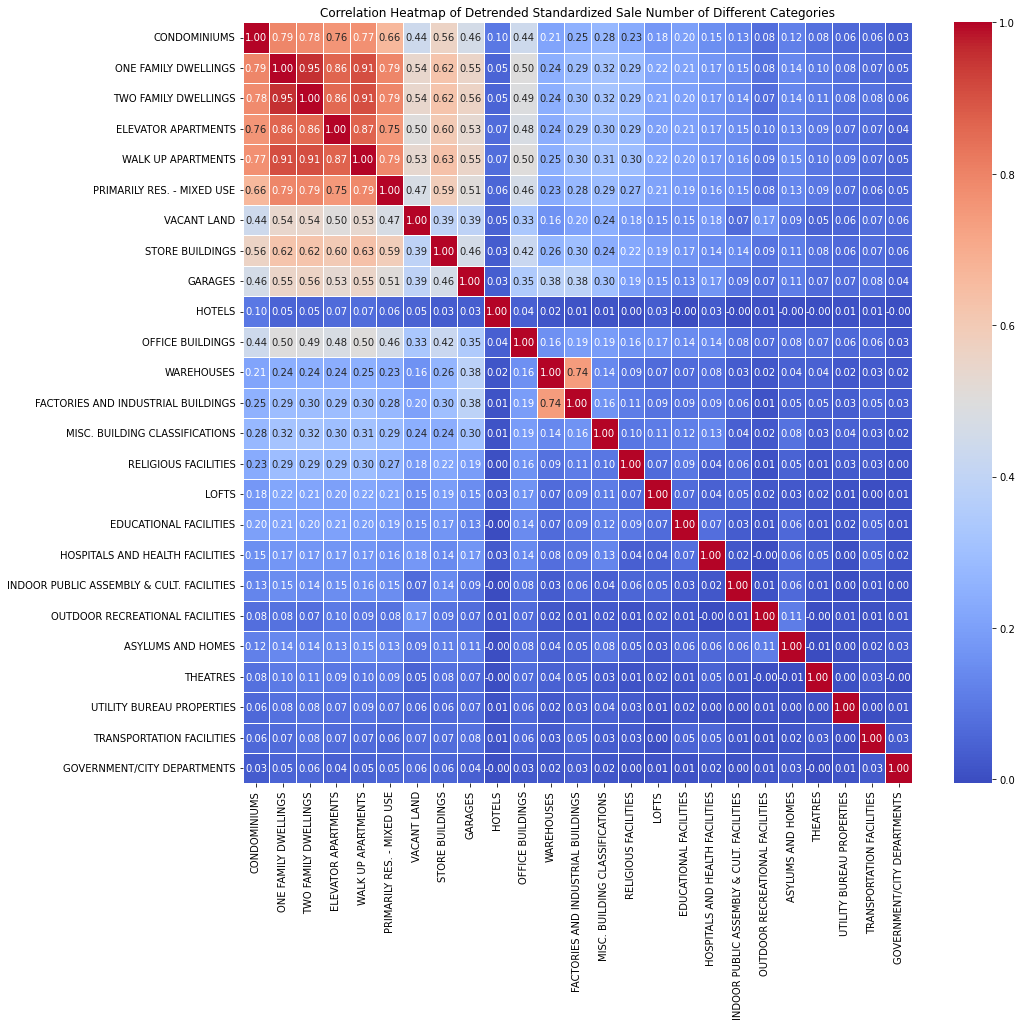

In [214]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_result.iloc[:,1:]), columns=df_result.columns[1:])
correlation_matrix = (df_standardized-df_standardized.rolling(window=7).mean())[category_list].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Detrended Standardized Sale Number of Different Categories')
plt.savefig("plot 44.png")
plt.show()

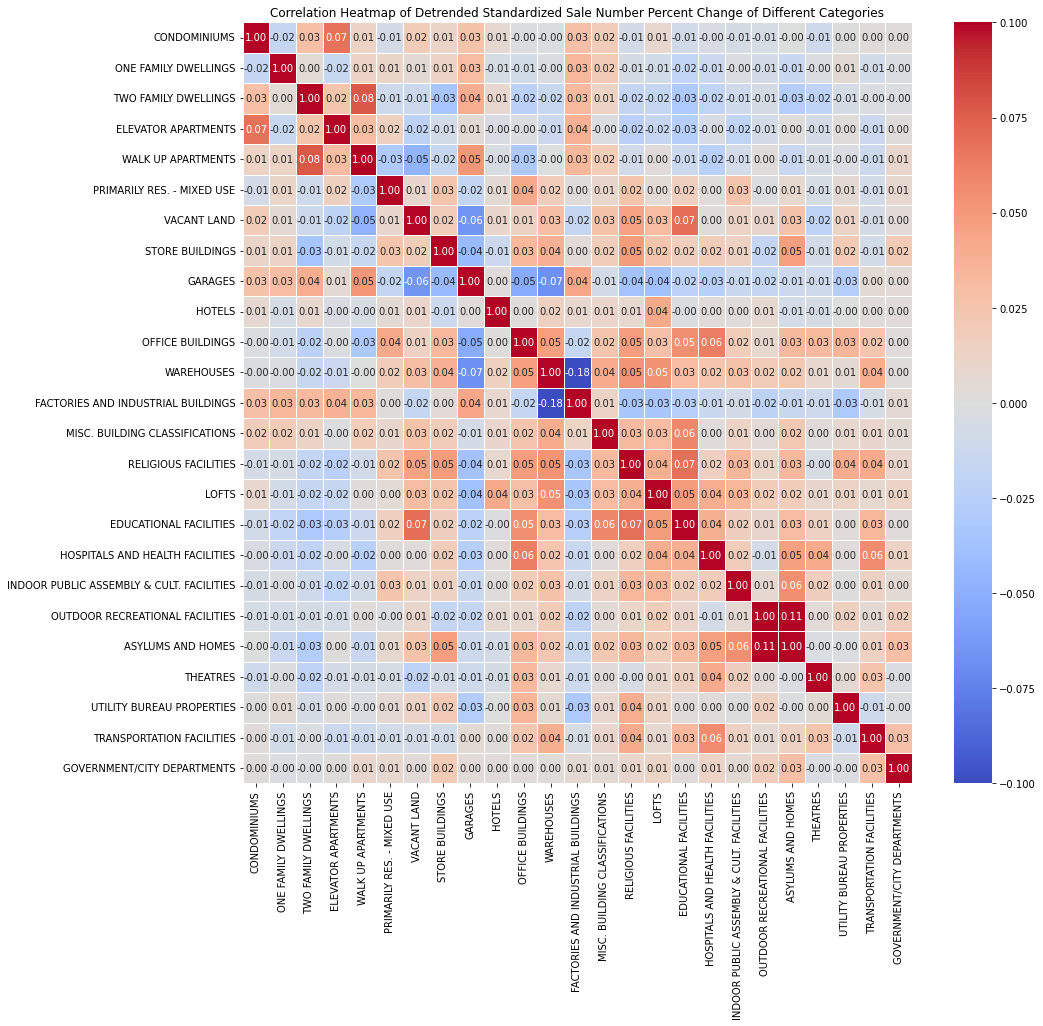

In [219]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_result.iloc[:,1:]), columns=df_result.columns[1:])
df_standardized = df_standardized.pct_change()
correlation_matrix = (df_standardized-df_standardized.rolling(window=7).mean())[category_list].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-0.1, vmax=0.1)
plt.title('Correlation Heatmap of Detrended Standardized Sale Number Percent Change of Different Categories')
plt.savefig("plot 49.png")
plt.show()

<Figure size 2160x2160 with 0 Axes>

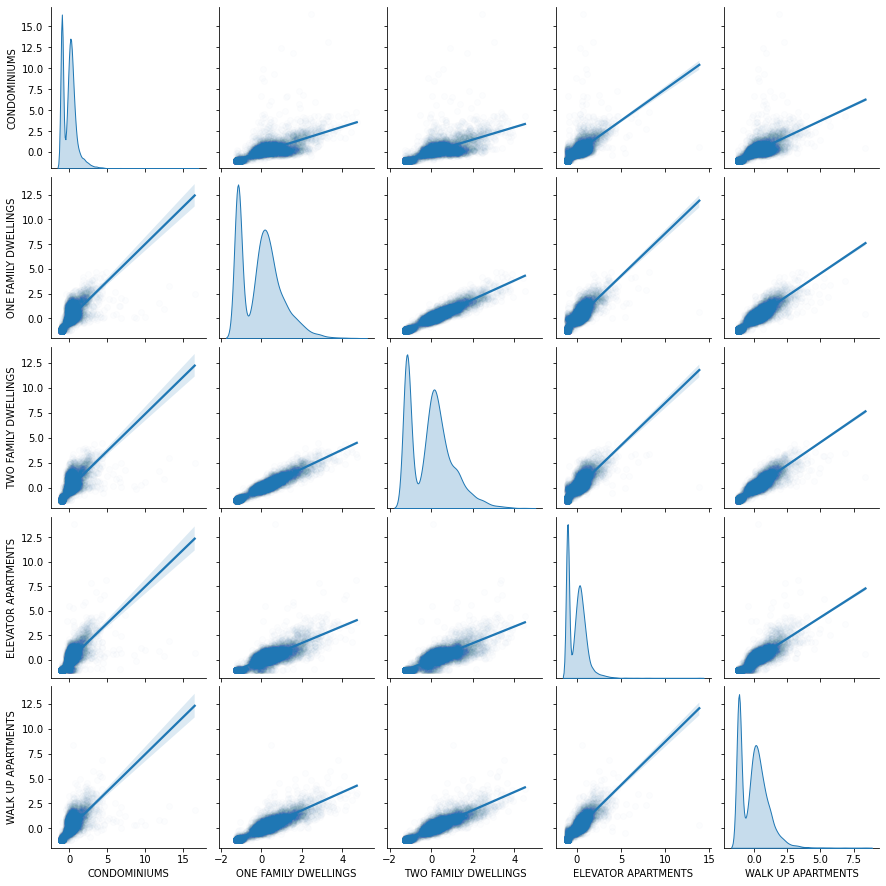

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
df_standardized = pd.DataFrame(scaler.fit_transform(df_result.iloc[:,1:]), columns=df_result.columns[1:])
sns.pairplot(df_standardized.iloc[:,:5],kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.01}})
plt.savefig("plot 51.png")
plt.show()

<Figure size 2160x2160 with 0 Axes>

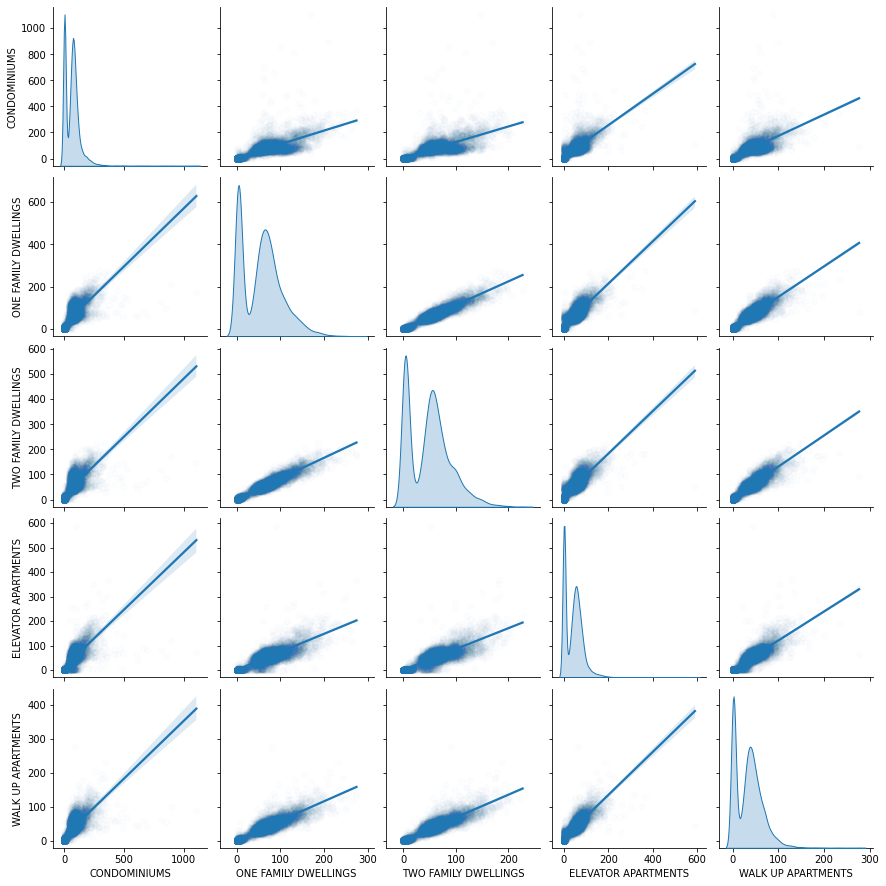

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
sns.pairplot(df_result.iloc[:,1:6],kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.01}})
plt.savefig("plot 50.png")
plt.show()

<Figure size 2160x2160 with 0 Axes>

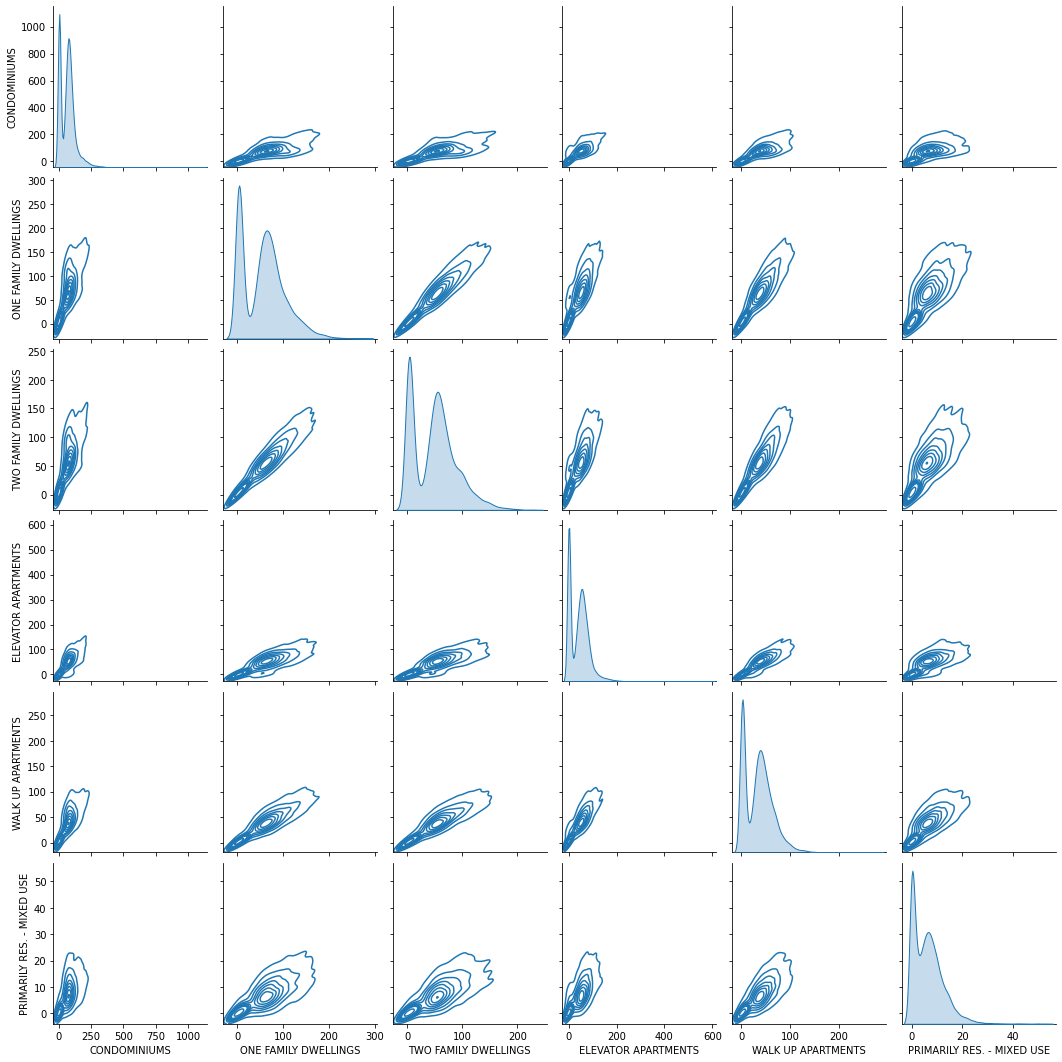

In [225]:

plt.figure(figsize=(30, 30))
sns.pairplot(df_result.iloc[:,1:7],kind='kde', diag_kind='kde')
plt.show()

In [ ]:
import seaborn as sns
# Calculate the correlation matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_result.iloc[:,1:]), columns=df_result.columns[1:])
df_standardized = df_standardized.pct_change()
correlation_matrix = (df_standardized-df_standardized.rolling(window=7).mean())[category_list].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Detrended Standardized Sale Number Percent Change of Different Categories')
plt.savefig("plot 46.png")
plt.show()

In [266]:
df_result.columns

Index(['SALE DATE', 'CONDOMINIUMS', 'ONE FAMILY DWELLINGS',
       'TWO FAMILY DWELLINGS', 'ELEVATOR APARTMENTS', 'WALK UP APARTMENTS',
       'PRIMARILY RES. - MIXED USE', 'VACANT LAND', 'STORE BUILDINGS',
       'GARAGES', 'HOTELS', 'OFFICE BUILDINGS', 'WAREHOUSES',
       'FACTORIES AND INDUSTRIAL BUILDINGS', 'MISC. BUILDING CLASSIFICATIONS',
       'RELIGIOUS FACILITIES', 'LOFTS', 'EDUCATIONAL FACILITIES',
       'HOSPITALS AND HEALTH FACILITIES',
       'INDOOR PUBLIC ASSEMBLY & CULT. FACILITIES',
       'OUTDOOR RECREATIONAL FACILITIES', 'ASYLUMS AND HOMES', 'THEATRES',
       'UTILITY BUREAU PROPERTIES', 'TRANSPORTATION FACILITIES',
       'GOVERNMENT/CITY DEPARTMENTS'],
      dtype='object')

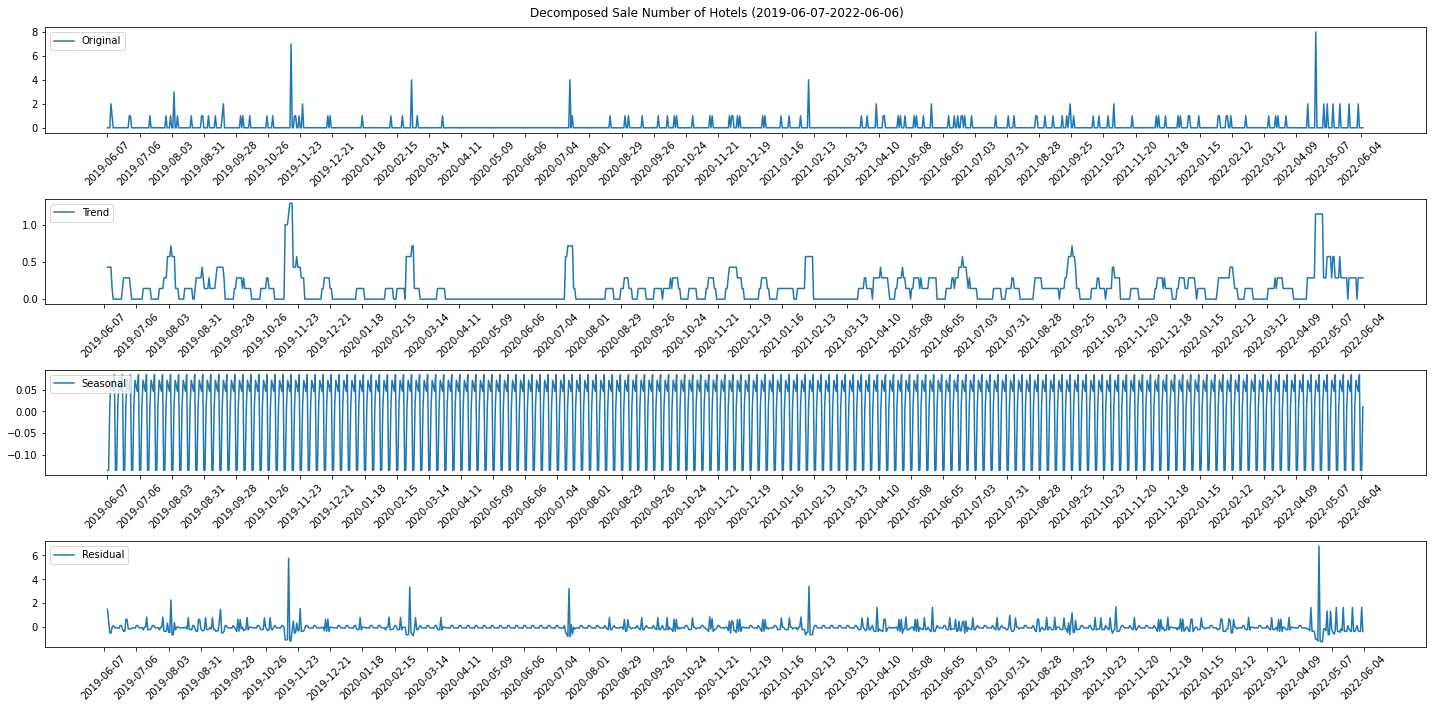

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
n = 28
k = 6000
category = "HOTELS"
# Sample time series data
df = df_result[["SALE DATE",category]][k:k+3*365]
min_date = str(min(df["SALE DATE"]))
max_date = str(max(df["SALE DATE"]))
# Perform seasonal decomposition
result = seasonal_decompose(df[category], model='additive', period=7)  # You may need to adjust the period
date = df["SALE DATE"]
# Plot the decomposition
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=3.85)
plt.suptitle(title := f"Decomposed Sale Number of {category.title()} ({min_date}-{max_date})")
plt.subplot(4, 1, 1)
plt.plot(date, df[category], label='Original')
plt.xticks(range(0, len(date), n), list(date)[::n])
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(date, result.trend, label='Trend')
plt.xticks(range(0, len(date), n), list(date)[::n])
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(date, result.seasonal, label='Seasonal')
plt.xticks(range(0, len(date), n), list(date)[::n])
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(date, result.resid, label='Residual')
plt.xticks(range(0, len(date), n), list(date)[::n])
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig(title)
plt.show()

<Figure size 1080x432 with 0 Axes>

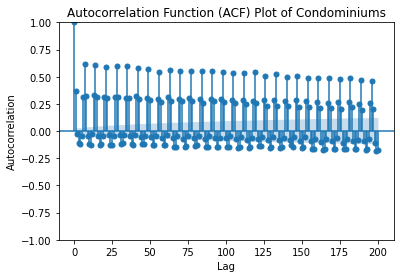

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(15, 6))
category = "CONDOMINIUMS"
plot_acf(df_result[category], lags=200)
plt.title(title:=f'Autocorrelation Function (ACF) Plot of {category.title()}')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.savefig(title)
plt.show()

In [289]:
def get_most_central_elements(lst, k):
    # Calculate the midpoint
    midpoint = len(lst) // 2
    
    # Calculate the starting index for the window
    start_index = max(0, midpoint - k // 2)
    
    # Calculate the ending index for the window
    end_index = min(len(lst), start_index + k)
    
    # Get the central elements within the window
    central_elements = lst[start_index:end_index]
    
    return central_elements

In [295]:
df_result.columns

Index(['SALE DATE', 'CONDOMINIUMS', 'ONE FAMILY DWELLINGS',
       'TWO FAMILY DWELLINGS', 'ELEVATOR APARTMENTS', 'WALK UP APARTMENTS',
       'PRIMARILY RES. - MIXED USE', 'VACANT LAND', 'STORE BUILDINGS',
       'GARAGES', 'HOTELS', 'OFFICE BUILDINGS', 'WAREHOUSES',
       'FACTORIES AND INDUSTRIAL BUILDINGS', 'MISC. BUILDING CLASSIFICATIONS',
       'RELIGIOUS FACILITIES', 'LOFTS', 'EDUCATIONAL FACILITIES',
       'HOSPITALS AND HEALTH FACILITIES',
       'INDOOR PUBLIC ASSEMBLY & CULT. FACILITIES',
       'OUTDOOR RECREATIONAL FACILITIES', 'ASYLUMS AND HOMES', 'THEATRES',
       'UTILITY BUREAU PROPERTIES', 'TRANSPORTATION FACILITIES',
       'GOVERNMENT/CITY DEPARTMENTS'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


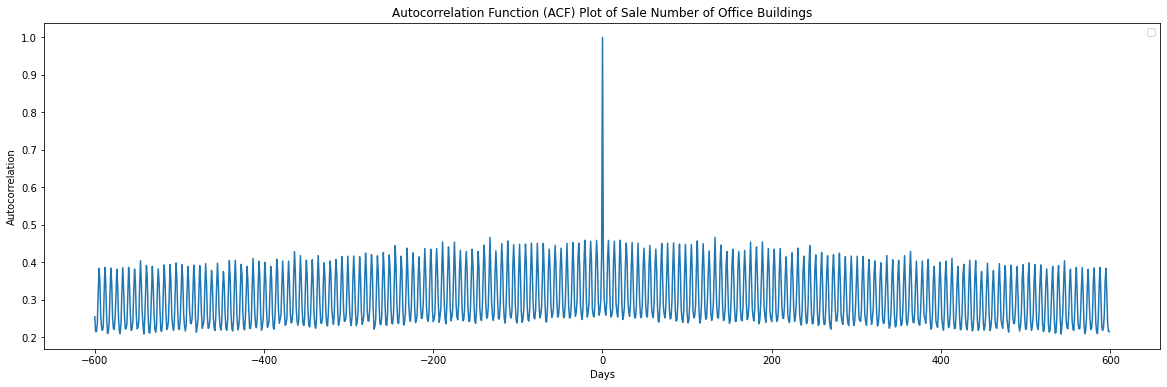

In [309]:
def plot_stock_ACF(category):
    plt.figure(figsize=(20, 6))
    vector = df_result[category].astype(float)
    autocorrelation = np.correlate(vector, vector, mode='full')
    autocorrelation /= np.max(autocorrelation)
    lags = np.arange(-len(vector) + 1, len(vector))
    days = 1200
    plt.plot(get_most_central_elements(lags,days), get_most_central_elements(autocorrelation,days))
    plt.title(title:=f'Autocorrelation Function (ACF) Plot of Sale Number of {category.title()}')
    plt.xlabel('Days')
    plt.ylabel('Autocorrelation')
    plt.savefig(title+" 3")
    plt.legend()
    plt.show()

plot_stock_ACF("OFFICE BUILDINGS")

In [276]:
vector = df_result[category].astype(float)
autocorrelation = np.correlate(vector, vector, mode='full')
autocorrelation /= np.max(autocorrelation)
lags = np.arange(-len(vector) + 1, len(vector))
plt.stem(lags, autocorrelation, use_line_collection=True)
plt.title('Stock Price Change Rate Autocorrelation Function'+" "+name)
plt.xlabel('Days')
plt.ylabel('Stock Price Change Rate Autocorrelation Function')
plt.legend()
plt.show()

UFuncTypeError: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [277]:
autocorrelation

array([  6, 120, 746, ..., 746, 120,   6], dtype=int64)

In [8]:
building_class_dict = {
    'A': 'ONE FAMILY DWELLINGS',
    'A0': 'CAPE COD',
    'A1': 'TWO STORIES - DETACHED SM OR MID',
    'A2': 'ONE STORY - PERMANENT LIVING QUARTER',
    'A3': 'LARGE SUBURBAN RESIDENCE',
    'A4': 'CITY RESIDENCE ONE FAMILY',
    'A5': 'ONE FAMILY ATTACHED OR SEMI-DETACHED',
    'A6': 'SUMMER COTTAGE',
    'A7': 'MANSION TYPE OR TOWN HOUSE',
    'A8': 'BUNGALOW COLONY - COOPERATIVELY OWNED LAND',
    'A9': 'MISCELLANEOUS ONE FAMILY',
    'B': 'TWO FAMILY DWELLINGS',
    'B1': 'TWO FAMILY BRICK',
    'B2': 'TWO FAMILY FRAME',
    'B3': 'TWO FAMILY CONVERTED FROM ONE FAMILY',
    'B9': 'MISCELLANEOUS TWO FAMILY',
    'C': 'WALK UP APARTMENTS',
    'C0': 'THREE FAMILIES',
    'C1': 'OVER SIX FAMILIES WITHOUT STORES',
    'C2': 'FIVE TO SIX FAMILIES',
    'C3': 'FOUR FAMILIES',
    'C4': 'OLD LAW TENEMENT',
    'C5': 'CONVERTED DWELLINGS OR ROOMING HOUSE',
    'C6': 'WALK-UP COOPERATIVE',
    'C7': 'WALK-UP APT. OVER SIX FAMILIES WITH STORES',
    'C8': 'WALK-UP CO-OP; CONVERSION FROM LOFT/WAREHOUSE',
    'C9': 'GARDEN APARTMENTS',
    'CB': 'WALKUP APT LESS THAN 11 UNITS RESIDENTIAL',
    'CC': 'WALKUP CO-OP APT LESS THAN 11 UNITS RESIDENTIAL',
    'CM': 'MOBILE HOMES/TRAILER PARKS',
    'D': 'ELEVATOR APARTMENTS',
    'D0': 'ELEVATOR CO-OP; CONVERSION FROM LOFT/WAREHOUSE',
    'D1': 'ELEVATOR APT; SEMI-FIREPROOF WITHOUT STORES',
    'D2': 'ELEVATOR APT; ARTISTS IN RESIDENCE',
    'D3': 'ELEVATOR APT; FIREPROOF WITHOUT STORES',
    'D4': 'ELEVATOR COOPERATIVE',
    'D5': 'ELEVATOR APT; CONVERTED',
    'D6': 'ELEVATOR APT; FIREPROOF WITH STORES',
    'D7': 'ELEVATOR APT; SEMI-FIREPROOF WITH STORES',
    'D8': 'ELEVATOR APT; LUXURY TYPE',
    'D9': 'ELEVATOR APT; MISCELLANEOUS',
    'DB': 'ELEVATOR APT LESS THAN 11 UNITS RESIDENTIAL',
    'DC': 'ELEVATOR CO-OP APT LESS THAN 11 UNITS RESIDENTIAL',
    'E': 'WAREHOUSES',
    'E1': 'GENERAL WAREHOUSE',
    'E2': 'CONTRACTORS WAREHOUSE',
    'E7': 'SELF-STORAGE WAREHOUSES',
    'E9': 'MISCELLANEOUS WAREHOUSE',
    'F': 'FACTORIES AND INDUSTRIAL BUILDINGS',
    'F1': 'FACTORY; HEAVY MANUFACTURING - FIREPROOF',
    'F2': 'FACTORY; SPECIAL CONSTRUCTION - FIREPROOF',
    'F4': 'FACTORY; INDUSTRIAL SEMI-FIREPROOF',
    'F5': 'FACTORY; LIGHT MANUFACTURING',
    'F8': 'FACTORY; TANK FARM',
    'F9': 'FACTORY; INDUSTRIAL-MISCELLANEOUS',
    'G': 'GARAGES',
    'G0': 'GARAGE; RESIDENTIAL TAX CLASS 1',
    'G1': 'ALL PARKING GARAGES',
    'G2': 'AUTO BODY/COLLISION OR AUTO REPAIR',
    'G3': 'GAS STATION WITH RETAIL STORE',
    'G4': 'GAS STATION WITH SERVICE/AUTO REPAIR',
    'G5': 'GAS STATION ONLY WITH/WITHOUT SMALL KIOSK',
    'G6': 'LICENSED PARKING LOT',
    'G7': 'UNLICENSED PARKING LOT',
    'G8': 'CAR SALES/RENTAL WITH SHOWROOM',
    'G9': 'MISCELLANEOUS GARAGE',
    'GU': 'CAR SALES OR RENTAL LOTS WITHOUT SHOWROOM',
    'GW': 'CAR WASH OR LUBRITORIUM FACILITY',
    'H': 'HOTELS',
    'HB': 'BOUTIQUE: 10-100 ROOMS, W/LUXURY FACILITIES, THEMED, STYLISH, W/FULL SVC ACCOMMODATIONS',
    'HH': 'HOSTELS- BED RENTALS IN DORMITORY-LIKE SETTINGS W/SHARED ROOMS & BATHROOMS',
    'HR': 'SRO- 1 OR 2 PEOPLE HOUSED IN INDIVIDUAL ROOMS IN MULTIPLE DWELLING AFFORDABLE HOUSING',
    'HS': 'EXTENDED STAY/SUITE: AMENITIES SIMILAR TO APT; TYPICALLY CHARGE WEEKLY RATES & LESS EXPENSIVE THAN FULL-SERVICE HOTEL',
    'H1': 'LUXURY HOTEL',
    'H2': 'FULL SERVICE HOTEL',
    'H3': 'LIMITED SERVICE; MANY AFFILIATED WITH NATIONAL CHAIN',
    'H4': 'MOTEL',
    'H5': 'HOTEL; PRIVATE CLUB, LUXURY TYPE',
    'H6': 'APARTMENT HOTEL',
    'H7': 'APARTMENT HOTEL - COOPERATIVELY OWNED',
    'H8': 'DORMITORY',
    'H9': 'MISCELLANEOUS HOTEL',
    'I': 'HOSPITALS AND HEALTH FACILITIES',
    'I1': 'HOSPITAL, SANITARIUM, MENTAL INSTITUTION',
    'I2': 'INFIRMARY',
    'I3': 'DISPENSARY',
    'I4': 'HOSPITAL; STAFF FACILITY',
    'I5': 'HEALTH CENTER, CHILD CENTER, CLINIC',
    'I6': 'NURSING HOME',
    'I7': 'ADULT CARE FACILITY',
    'I9': 'MISCELLANEOUS HOSPITAL, HEALTH CARE FACILITY',
    'J': 'THEATRES',
    'J1': 'THEATRE; ART TYPE LESS THAN 400 SEATS',
    'J2': 'THEATRE; ART TYPE MORE THAN 400 SEATS',
    'J3': 'MOTION PICTURE THEATRE WITH BALCONY',
    'J4': 'LEGITIMATE THEATRE, SOLE USE',
    'J5': 'THEATRE IN MIXED-USE BUILDING',
    'J6': 'TELEVISION STUDIO',
    'J7': 'OFF BROADWAY TYPE THEATRE',
    'J8': 'MULTIPLEX PICTURE THEATRE',
    'J9': 'MISCELLANEOUS THEATRE',
    'K': 'STORE BUILDINGS',
    'K1': 'ONE STORY RETAIL BUILDING',
    'K2': 'MULTI-STORY RETAIL BUILDING (2 OR MORE)',
    'K3': 'MULTI-STORY DEPARTMENT STORE',
    'K4': 'PREDOMINANT RETAIL WITH OTHER USES',
    'K5': 'STAND-ALONE FOOD ESTABLISHMENT',
    'K6': 'SHOPPING CENTER WITH OR WITHOUT PARKING',
    'K7': 'BANKING FACILITIES WITH OR WITHOUT PARKING',
    'K8': "BIG BOX RETAIL: NOT AFFIXED & STANDING ON OWN LOT W/PARKING, E.G. COSTCO & BJ'S",
    'K9': 'MISCELLANEOUS STORE BUILDING',
    'L': 'LOFTS',
    'L1': 'LOFT; OVER 8 STORIES (MID MANH. TYPE)',
    'L2': 'LOFT; FIREPROOF AND STORAGE TYPE WITHOUT STORES',
    'L3': 'LOFT; SEMI-FIREPROOF',
    'L8': 'LOFT; WITH RETAIL STORES OTHER THAN TYPE ONE',
    'L9': 'MISCELLANEOUS LOFT',
    'M': 'RELIGIOUS FACILITIES',
    'M1': 'CHURCH, SYNAGOGUE, CHAPEL',
    'M2': 'MISSION HOUSE (NON-RESIDENTIAL)',
    'M3': 'PARSONAGE, RECTORY',
    'M4': 'CONVENT',
    'M9': 'MISCELLANEOUS RELIGIOUS FACILITY',
    'N': 'ASYLUMS AND HOMES',
    'N1': 'ASYLUM',
    'N2': 'HOME FOR INDIGENT CHILDREN, AGED, HOMELESS',
    'N3': 'ORPHANAGE',
    'N4': 'DETENTION HOUSE FOR WAYWARD GIRLS',
    'N9': 'MISCELLANEOUS ASYLUM, HOME',
    'O': 'OFFICE BUILDINGS',
    'O1': 'OFFICE ONLY - 1 STORY',
    'O2': 'OFFICE ONLY 2 - 6 STORIES',
    'O3': 'OFFICE ONLY 7 - 19 STORIES',
    'O4': 'OFFICE ONLY WITH OR WITHOUT COMM - 20 STORIES OR MORE',
    'O5': 'OFFICE WITH COMM - 1 TO 6 STORIES',
    'O6': 'OFFICE WITH COMM 7 - 19 STORIES',
    'O7': 'PROFESSIONAL BUILDINGS/STAND ALONE FUNERAL HOMES',
    'O8': 'OFFICE WITH APARTMENTS ONLY (NO COMM)',
    'O9': 'MISCELLANEOUS AND OLD STYLE BANK BLDGS.',
    'P': 'INDOOR PUBLIC ASSEMBLY & CULT. FACILITIES',
    'P1': 'CONCERT HALL',
    'P2': 'LODGE ROOM',
    'P3': 'YWCA, YMCA, YWHA, YMHA, PAL',
    'P4': 'BEACH CLUB',
    'P5': 'COMMUNITY CENTER',
    'P6': 'AMUSEMENT PLACE, BATH HOUSE, BOAT HOUSE',
    'P7': 'MUSEUM',
    'P8': 'LIBRARY',
    'P9': 'MISCELLANEOUS INDOOR PUBLIC ASSEMBLY',
    'Q': 'OUTDOOR RECREATIONAL FACILITIES',
    'Q1': 'PARKS/RECREATION FACILITY',
    'Q2': 'PLAYGROUND',
    'Q3': 'OUTDOOR POOL',
    'Q4': 'BEACH',
    'Q5': 'GOLF COURSE',
    'Q6': 'STADIUM, RACE TRACK, BASEBALL FIELD',
    'Q7': 'TENNIS COURT',
    'Q8': 'MARINA, YACHT CLUB',
    'Q9': 'MISCELLANEOUS OUTDOOR RECREATIONAL FACILITY',
    'R': 'CONDOMINIUMS',
    'RA': 'CULTURAL, MEDICAL, EDUCATIONAL, ETC.',
    'RB': 'OFFICE SPACE',
    'RG': 'INDOOR PARKING',
    'RH': 'HOTEL/BOATEL',
    'RK': 'RETAIL SPACE',
    'RP': 'OUTDOOR PARKING',
    'RR': 'CONDOMINIUM RENTALS',
    'RS': 'NON-BUSINESS STORAGE SPACE',
    'RT': 'TERRACES/GARDENS/CABANAS',
    'RW': 'WAREHOUSE/FACTORY/INDUSTRIAL',
    'R0': 'SPECIAL CONDOMINIUM BILLING LOT',
    'R1': 'CONDO; RESIDENTIAL UNIT IN 2-10 UNIT BLDG.',
    'R2': 'CONDO; RESIDENTIAL UNIT IN WALK-UP BLDG.',
    'R3': 'CONDO; RESIDENTIAL UNIT IN 1-3 STORY BLDG.',
    'R4': 'CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.',
    'R5': 'MISCELLANEOUS COMMERCIAL',
    'R6': 'CONDO; RESID.UNIT OF 1-3 UNIT BLDG-ORIG CLASS 1',
    'R7': 'CONDO; COMML.UNIT OF 1-3 UNIT BLDG-ORIG CLASS 1',
    'R8': 'CONDO; COMML.UNIT OF 2-10 UNIT BLDG.',
    'R9': 'CO-OP WITHIN A CONDOMINIUM',
    'S': 'PRIMARILY RES. - MIXED USE',
    'S0': 'PRIMARILY 1 FAMILY WITH 2 STORES OR OFFICES',
    'S1': 'PRIMARILY 1 FAMILY WITH 1 STORE OR OFFICE',
    'S2': 'PRIMARILY 2 FAMILY WITH 1 STORE OR OFFICE',
    'S3': 'PRIMARILY 3 FAMILY WITH 1 STORE OR OFFICE',
    'S4': 'PRIMARILY 4 FAMILY WITH 1 STORE OROFFICE',
    'S5': 'PRIMARILY 5-6 FAMILY WITH 1 STORE OR OFFICE',
    'S9': 'SINGLE OR MULTIPLE DWELLING WITH STORES OR OFFICES',
    'T': 'TRANSPORTATION FACILITIES',
    'T1': 'AIRPORT, AIRFIELD, TERMINAL',
    'T2': 'PIER, DOCK, BULKHEAD',
    'T9': 'MISCELLANEOUS TRANSPORTATION FACILITY',
    'U': 'UTILITY BUREAU PROPERTIES',
    'U0': 'UTILITY COMPANY LAND AND BUILDING',
    'U1': 'BRIDGE, TUNNEL, HIGHWAY',
    'U2': 'GAS OR ELECTRIC UTILITY',
    'U3': 'CEILING RAILROAD',
    'U4': 'TELEPHONE UTILITY',
    'U5': 'COMMUNICATION FACILITY OTHER THAN TELEPHONE',
    'U6': 'RAILROAD - PRIVATE OWNERSHIP',
    'U7': 'TRANSPORTATION - PUBLIC OWNERSHIP',
    'U8': 'REVOCABLE CONSENT',
    'U9': 'MISCELLANEOUS UTILITY PROPERTY',
    'V': 'VACANT LAND',
    'V0': 'ZONED RESIDENTIAL; NOT MANHATTAN',
    'V1': 'ZONED COMMERCIAL OR MANHATTAN RESIDENTIAL',
    'V2': 'ZONED COMMERCIAL ADJACENT TO CLASS 1 DWELLING: NOT MANHATTAN',
    'V3': 'ZONED PRIMARILY RESIDENTIAL; NOT MANHATTAN',
    'V4': 'POLICE OR FIRE DEPARTMENT',
    'V5': 'SCHOOL SITE OR YARD',
    'V6': 'LIBRARY, HOSPITAL OR MUSEUM',
    'V7': 'PORT AUTHORITY OF NEW YORK AND NEW JERSEY',
    'V8': 'NEW YORK STATE OR US GOVERNMENT',
    'V9': 'MISCELLANEOUS VACANT LAND',
    'W': 'EDUCATIONAL FACILITIES',
    'W1': 'PUBLIC ELEMENTARY, JUNIOR OR SENIOR HIGH',
    'W2': 'PAROCHIAL SCHOOL, YESHIVA',
    'W3': 'SCHOOL OR ACADEMY',
    'W4': 'TRAINING SCHOOL',
    'W5': 'CITY UNIVERSITY',
    'W6': 'OTHER COLLEGE AND UNIVERSITY',
    'W7': 'THEOLOGICAL SEMINARY',
    'W8': 'OTHER PRIVATE SCHOOL',
    'W9': 'MISCELLANEOUS EDUCATIONAL FACILITY',
    'Y': 'GOVERNMENT/CITY DEPARTMENTS',
    'Y1': 'FIRE DEPARTMENT',
    'Y2': 'POLICE DEPARTMENT',
    'Y3': 'PRISON, JAIL, HOUSE OF DETENTION',
    'Y4': 'MILITARY AND NAVAL INSTALLATION',
    'Y5': 'DEPARTMENT OF REAL ESTATE',
    'Y6': 'DEPARTMENT OF SANITATION',
    'Y7': 'DEPARTMENT OF PORTS AND TERMINALS',
    'Y8': 'DEPARTMENT OF PUBLIC WORKS',
    'Y9': 'DEPARTMENT OF ENVIRONMENTAL PROTECTION',
    'Z': 'MISC. BUILDING CLASSIFICATIONS',
    'Z0': 'TENNIS COURT, POOL, SHED, ETC.',
    'Z1': 'COURT HOUSE',
    'Z2': 'PUBLIC PARKING AREA',
    'Z3': 'POST OFFICE',
    'Z4': 'FOREIGN GOVERNMENT',
    'Z5': 'UNITED NATIONS',
    'Z7': 'EASEMENT',
    'Z8': 'CEMETERY',
    'Z9': 'OTHER MISCELLANEOUS',
}

In [4]:
df_2016 = df_1[df_1["YEAR"] == 2016]
df_2017 = df_1[df_1["YEAR"] == 2017]
df_2018 = df_1[df_1["YEAR"] == 2018]
df_2019 = df_1[df_1["YEAR"] == 2019]
df_2020 = df_1[df_1["YEAR"] == 2020]
df_2021 = df_1[df_1["YEAR"] == 2021]
df_2022 = df_1[df_1["YEAR"] == 2022]
df_dict = {"2016":df_2016, "2017":df_2017, "2018":df_2018, "2019":df_2019,
           "2020":df_2020, "2021":df_2021, "2022":df_2022}

In [5]:
import h2o
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator
from h2o.frame import H2OFrame
import numpy as np

def get_percentage_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / np.abs(y_true) * 100)

def rf_get_result_price(df):
    h2o_df = H2OFrame(df)
    response_col = 'SALE PRICE'
    predictors = [col for col in h2o_df.columns if col != response_col]
    train, test = h2o_df.split_frame(ratios=[0.9], seed=42)
    rf_model = H2ORandomForestEstimator(
    ntrees=50,
    max_depth=50,
    seed=42
    )
    rf_model.train(x=predictors, y=response_col, training_frame=train)
    feature_importance = rf_model.varimp()
    predictions = rf_model.predict(test).as_data_frame().values
    test = test.as_data_frame()[response_col].values
    mse = rf_model.mse()
    mae = rf_model.mae()
    percentage_error = get_percentage_error(test,predictions)
    print("mse: ",mse,"\n","mae: ",mae,"\n","percentage_error: ",percentage_error)
    return (mse,mae,percentage_error,feature_importance)

def rf_get_result_cv(df):
    h2o_df = H2OFrame(df)
    response_col = 'SALE PRICE'
    predictors = [col for col in h2o_df.columns if col != response_col]
    train, test = h2o_df.split_frame(ratios=[0.9], seed=42)
    rf_model = H2ORandomForestEstimator(
        seed=42,
        nfolds=5,
        keep_cross_validation_predictions=True
    )
    hyperparameters = {
        'ntrees': [50, 100, 150],
        'max_depth': [10, 20, 30]
    }
    grid = H2OGridSearch(rf_model, hyperparameters)
    grid.train(x=predictors, y=response_col, training_frame=train)
    rf_model = grid.get_grid()[0]
    feature_importance = rf_model.varimp()
    predictions = rf_model.predict(test).as_data_frame().values
    test = test.as_data_frame()[response_col].values
    mse = rf_model.mse()
    mae = rf_model.mae()
    percentage_error = get_percentage_error(test,predictions)
    print("mse: ",mse,"\n","mae: ",mae,"\n","percentage_error: ",percentage_error)
    return (mse,mae,percentage_error,feature_importance)

In [7]:
import time

mse_list = []
mae_list = []
percentage_error_list = []
feature_importance_list = []
h2o.init()
for key,val in list(df_dict.items())[:]:
    print(key,"  start")
    start_time = time.time()
    mse,mae,percentage_error,feature_importance = rf_get_result_cv(val)
    mse_list.append(mse)
    mae_list.append(mae)
    percentage_error_list.append(percentage_error)
    feature_importance_list.append(feature_importance)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(key,"  end")
    print(f"Time: {elapsed_time} seconds")

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------
H2O_cluster_uptime:         20 mins 44 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    1 month
H2O_cluster_name:           H2O_from_python_DELL_yipocp
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    618 Mb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.4 final
--------------------------  -----------------------------

2016   start
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Grid Build progress: |███ (failed)


OSError: Job with key $03017f00000132d4ffffffff$_992074e71812afcb7cd32295b38748bf failed with an exception: java.lang.OutOfMemoryError: Java heap space
stacktrace: 
java.lang.OutOfMemoryError: Java heap space


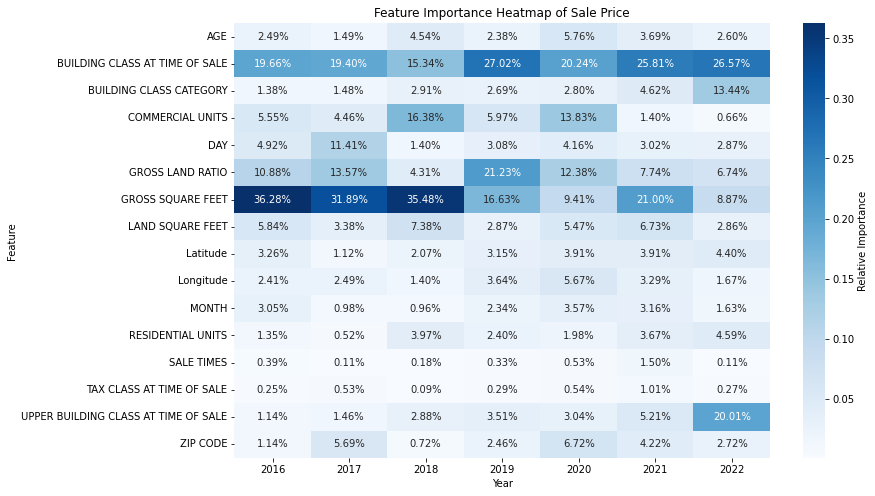

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

flat_feature_importance = [item for sublist in feature_importance_list for item in sublist]
df = pd.DataFrame(flat_feature_importance, columns=['Feature', 'Importance', 'Relative Importance', 'Cumulative Importance'])
df['Year'] = ['2016']*16+['2017']*16+['2018']*16+['2019']*16+['2020']*16+['2021']*16+['2022']*16
df.set_index('Year', inplace=True)
df_pivot = df.pivot_table(index='Feature', columns='Year', values='Cumulative Importance', aggfunc='first')
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, cmap='Blues', fmt=".2%", cbar_kws={'label': 'Relative Importance'})
plt.title(title:='Feature Importance Heatmap of Sale Price in Cross Validation')
plt.xlabel('Year')
plt.ylabel('Feature')
plt.savefig("../plots_2/"+title)
plt.show()

In [56]:
import pandas as pd

df_1 = pd.read_csv("filtered_data_197971.csv", index_col=0)
features = ["SALE TIMES", "GROSS LAND RATIO", 'DAY','MONTH','YEAR',
            'BUILDING CLASS CATEGORY', 'ZIP CODE', 'RESIDENTIAL UNITS',
            'COMMERCIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET',
            "UPPER BUILDING CLASS AT TIME OF SALE",
            'AGE', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
            'Latitude', 'Longitude',"PRICE PER GROSS AREA"]
df_1['SALE DATE'] = pd.to_datetime(df_1['SALE DATE'])
df_1['DAY'] = df_1['SALE DATE'].dt.day
df_1['MONTH'] = df_1['SALE DATE'].dt.month
df_1['YEAR'] = df_1['SALE DATE'].dt.year
df_1["SALE TIMES"] = df_1["ADDRESS"].map(df_1["ADDRESS"].value_counts().to_dict())
df_1["GROSS LAND RATIO"] = df_1["GROSS SQUARE FEET"]/df_1["LAND SQUARE FEET"]
df_1["PRICE PER GROSS AREA"] = df_1["SALE PRICE"]/df_1["GROSS SQUARE FEET"]
df_1["UPPER BUILDING CLASS AT TIME OF SALE"] = df_1[f"BUILDING CLASS AT TIME OF SALE"].str[0]
df_1 = df_1[features]
df_2016 = df_1[df_1["YEAR"] == 2016]
df_2017 = df_1[df_1["YEAR"] == 2017]
df_2018 = df_1[df_1["YEAR"] == 2018]
df_2019 = df_1[df_1["YEAR"] == 2019]
df_2020 = df_1[df_1["YEAR"] == 2020]
df_2021 = df_1[df_1["YEAR"] == 2021]
df_2022 = df_1[df_1["YEAR"] == 2022]
df_dict = {"2016":df_2016, "2017":df_2017, "2018":df_2018, "2019":df_2019,
           "2020":df_2020, "2021":df_2021, "2022":df_2022}

In [57]:
import h2o
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator
from h2o.frame import H2OFrame
import numpy as np

def get_percentage_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / np.abs(y_true) * 100)

def rf_get_result_unit_price(df):
    h2o.init()
    h2o_df = H2OFrame(df)
    response_col = 'PRICE PER GROSS AREA'
    predictors = [col for col in h2o_df.columns if col != response_col]
    train, test = h2o_df.split_frame(ratios=[0.9], seed=42)
    rf_model = H2ORandomForestEstimator(
    ntrees=50,
    max_depth=50,
    seed=42
    )
    rf_model.train(x=predictors, y=response_col, training_frame=train)
    feature_importance = rf_model.varimp()
    predictions = rf_model.predict(test).as_data_frame().values
    test = test.as_data_frame()[response_col].values
    mse = rf_model.mse()
    mae = rf_model.mae()
    percentage_error = get_percentage_error(test,predictions)
    print("mse: ",mse,"\n","mae: ",mae,"\n","percentage_error: ",percentage_error)
    return (mse,mae,percentage_error,feature_importance)

In [58]:
import time

mse_list = []
mae_list = []
percentage_error_list = []
feature_importance_list = []
for key,val in list(df_dict.items())[:]:
    print(key,"  start")
    start_time = time.time()
    mse,mae,percentage_error,feature_importance = rf_get_result_unit_price(val)
    mse_list.append(mse)
    mae_list.append(mae)
    percentage_error_list.append(percentage_error)
    feature_importance_list.append(feature_importance)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(key,"  end")
    print(f"Time: {elapsed_time} seconds")

2016   start
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------
H2O_cluster_uptime:         52 mins 00 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    29 days
H2O_cluster_name:           H2O_from_python_DELL_t70n1q
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.124 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.4 final
--------------------------  -----------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\h2o\estimators\estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [YEAR]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
mse:  1542660.8216867386 
 mae:  124.86851823893538 
 percentage_error:  2295.0214903746155
2016   end
Time: 65.95217680931091 seconds
2017   start
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------
H2O_cluster_uptime:         53 mins 12 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    29 days
H2O_cluster_name:           H2O_from_python_DELL_t70n1q
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    991 Mb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.4 final
--------------------------  -----------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\h2o\estimators\estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [YEAR]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
mse:  76736483.84674968 
 mae:  198.15380100044192 
 percentage_error:  572.0669646378334
2017   end
Time: 77.98770880699158 seconds
2018   start
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------
H2O_cluster_uptime:         54 mins 30 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    29 days
H2O_cluster_name:           H2O_from_python_DELL_t70n1q
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    877 Mb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.4 final
--------------------------  -----------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\h2o\estimators\estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [YEAR]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
mse:  231337.57911928004 
 mae:  140.06238705038552 
 percentage_error:  151.00954836445715
2018   end
Time: 76.34733986854553 seconds
2019   start
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------
H2O_cluster_uptime:         55 mins 46 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    29 days
H2O_cluster_name:           H2O_from_python_DELL_t70n1q
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    468.5 Mb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.4 final
--------------------------  -----------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\h2o\estimators\estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [YEAR]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
mse:  13933578.836789947 
 mae:  201.48380117840696 
 percentage_error:  189.4989457183674
2019   end
Time: 71.56400394439697 seconds
2020   start
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------
H2O_cluster_uptime:         56 mins 58 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    29 days
H2O_cluster_name:           H2O_from_python_DELL_t70n1q
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    638 Mb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.4 final
--------------------------  -----------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\h2o\estimators\estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [YEAR]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
mse:  416147.7555634415 
 mae:  146.44739873049244 
 percentage_error:  447.4409865037009
2020   end
Time: 68.41958689689636 seconds
2021   start
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------
H2O_cluster_uptime:         58 mins 04 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    29 days
H2O_cluster_name:           H2O_from_python_DELL_t70n1q
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    593 Mb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.4 final
--------------------------  -----------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\h2o\estimators\estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [YEAR]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
mse:  281701941.34767383 
 mae:  369.8334146451439 
 percentage_error:  201.44230990678253
2021   end
Time: 74.2434892654419 seconds
2022   start
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------
H2O_cluster_uptime:         59 mins 17 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    29 days
H2O_cluster_name:           H2O_from_python_DELL_t70n1q
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    458.9 Mb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.4 final
--------------------------  -----------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\h2o\estimators\estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [YEAR]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
mse:  5267944.2159972405 
 mae:  184.21066931263678 
 percentage_error:  303.79263933568495
2022   end
Time: 70.04115986824036 seconds


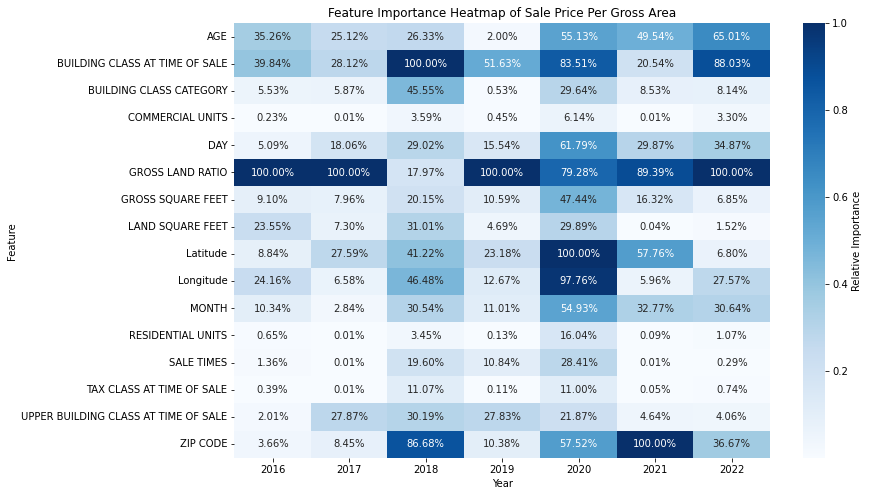

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

flat_feature_importance = [item for sublist in feature_importance_list for item in sublist]
df = pd.DataFrame(flat_feature_importance, columns=['Feature', 'Importance', 'Relative Importance', 'Cumulative Importance'])
df['Year'] = ['2016']*16+['2017']*16+['2018']*16+['2019']*16+['2020']*16+['2021']*16+['2022']*16
df.set_index('Year', inplace=True)
df_pivot = df.pivot_table(index='Feature', columns='Year', values='Cumulative Importance', aggfunc='first')
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, cmap='Blues', fmt=".2%", cbar_kws={'label': 'Relative Importance'})
plt.title(title:='Feature Importance Heatmap of Sale Price Per Gross Area in Cross Validation')
plt.xlabel('Year')
plt.ylabel('Feature')
plt.savefig("../plots_2/"+title)
plt.show()

In [64]:
df

Feature    Importance  Relative Importance  \
Year                                                                      
2016                GROSS LAND RATIO  4.871128e+11             1.000000   
2016  BUILDING CLASS AT TIME OF SALE  1.940540e+11             0.398376   
2016                             AGE  1.717619e+11             0.352612   
2016                       Longitude  1.176733e+11             0.241573   
2016                LAND SQUARE FEET  1.147173e+11             0.235505   
...                              ...           ...                  ...   
2022                COMMERCIAL UNITS  2.934418e+10             0.033032   
2022                LAND SQUARE FEET  1.348736e+10             0.015183   
2022               RESIDENTIAL UNITS  9.485854e+09             0.010678   
2022       TAX CLASS AT TIME OF SALE  6.601469e+09             0.007431   
2022                      SALE TIMES  2.546883e+09             0.002867   

      Cumulative Importance Set  
Year                             
2016               0.370361   1  
2016               0.147543   1  
2016               0.130594   1  
2016               0.089469   1  
2016               0.087222   1  
...                     ...  ..  
2022               0.007949   7  
2022               0.003653   7  
2022               0.002570   7  
2022               0.001788   7  
2022               0.000690   7  

[112 rows x 5 columns]

In [19]:
from sktime.forecasting.compose import ColumnEnsembleForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.arima import ARIMA
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from pysal.model import spreg
from pysal.lib import weights
import geopandas as gpd

features = ["SALE TIMES", "GROSS LAND RATIO", "SALE DATE",
            'BUILDING CLASS CATEGORY', 'ZIP CODE', 'RESIDENTIAL UNITS',
            'COMMERCIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET',
            "GROSS LAND RATIO",
            'AGE', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
            'Latitude', 'Longitude']
target = 'SALE PRICE'
ratio = 0.1

geometry = gpd.points_from_xy(df['Longitude'], df['Latitude'])
df_geo = gpd.GeoDataFrame(df, geometry=geometry)

df_train = df_geo[:int((1-ratio)*len(df_geo))]
df_test = df_geo[int((1-ratio)*len(df_geo)):]

# Separate features and target
X_train = df_train[features]
y_train = df_train[target]
X_test = df_test[features]
y_test = df_test[target]

spatial_features = ["Latitude", "Longitude"]
temporal_features = ["SALE DATE"]
categorical_features = ["BUILDING CLASS CATEGORY", 'ZIP CODE', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE']
numeric_features = ["SALE TIMES", "GROSS LAND RATIO", 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'AGE']
w_kernel = weights.Kernel.from_dataframe(df_geo, function='gaussian', bandwidth=0.005)

# Define models for each component
spatial_model = spreg.GM_Lag(
    y=df_train["SALE PRICE"].values,
    x=df_train[spatial_features].values,
    w=w_kernel,
    name_y="SALE_PRICE",
    name_x=spatial_features
)

temporal_model = ARIMA(order=(1, 1, 1))
remaining_features = CatBoostRegressor(iterations=100, random_state=42, cat_features=categorical_features)

# Define a spatio-temporal random forest model
spatio_temporal_rf = ColumnEnsembleForecaster(
    [
        ("spatial_rf", spatial_model, spatial_features),
        ("temporal_arima", temporal_model, temporal_features),
        ("remaining_features_cb", remaining_features, categorical_features + numeric_features),
    ]
)

# Train the model
spatio_temporal_rf.fit(X_train, y_train)

# Make predictions
y_pred = spatio_temporal_rf.predict(df_test)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, BatchNormalization

# Select relevant features and target variable
features = ['DAY', 'MONTH', 'YEAR', "SALE TIMES", "GROSS LAND RATIO",
            'BUILDING CLASS CATEGORY',
            'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'LAND SQUARE FEET',
            'GROSS SQUARE FEET', 'PRICE PER LAND SQUARE FEET',
            'PRICE PER GROSS SQUARE FEET', 'AGE', 'TAX CLASS AT TIME OF SALE',
            'BUILDING CLASS AT TIME OF SALE', 'Latitude',
            'Longitude']
target = 'SALE PRICE'

X = df_1[features].values
y = df_1[target].values

CATEGORICAL_FEATURES = ["BUILDING CLASS CATEGORY", 'ZIP CODE', 'TAX CLASS AT TIME OF SALE',
                        'TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE' ]
categorical_feature_indices = [features.index(feature) for feature in CATEGORICAL_FEATURES]
non_categorical_feature_indices = [i for i, feature in enumerate(features) if feature not in CATEGORICAL_FEATURES]

# Encode categorical variables
# Example: Encoding 'NEIGHBORHOOD'
label_encoder = LabelEncoder()
for i in categorical_feature_indices:
    X[:, i] = label_encoder.fit_transform(X[:, i])

# Standardize numeric features
scaler = StandardScaler()
X[:, non_categorical_feature_indices] = scaler.fit_transform(X[:, non_categorical_feature_indices])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Reshape input for 3D CNN (assuming you have sequential data)
X_train_reshaped = X_train.reshape((1, X_train.shape[0], X_train.shape[1], 1, len(features)))
X_test_reshaped = X_test.reshape((1, X_test.shape[0], X_test.shape[1], 1, len(features)))

# Build 3D CNN model
model = Sequential()
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', input_shape=(None, X_train.shape[1], 1, len(features))))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1))  # Output layer for regression task

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

ValueError: cannot reshape array of size 3373659 into shape (1,177561,19,1,19)